# TFM: algoritmos no supervisados

In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Leemos el catálogo con el que vamos a trabajar

In [2]:
cat = fits.open('ANF40pau_PAUS-COSMOS-radec-narrow-fluxes-err.fits')

In [3]:
#cat.info()

In [4]:
#cat[1].columns

In [5]:
tab = Table(cat[1].data)

In [6]:
#tab

Solo me interesan algunas columnas, convierto la tabla a pandas y filtro.

In [7]:
DF = tab.to_pandas()
#list(DF)

Columnas de interés con sus errores

In [8]:
Tab = DF[['ref_id','ra', 'dec', 'zspec', 'photoz','type', 'u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv','err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']]
#Tab

Una vez filtrada la tabla (**el DataFrame de trabajo bueno es Tab**) con las columnas que queremos

Tengo que añadir algunas columnas de interés, y manipular los datos.

- Columnas de color: con colores. *V-J*, *U-V*, *u-r*, *r-K*.
  **Importante, tenemos los flujos, de manera que los colores van como el cociente de los flujos**, mirar la ecuación de Pogson de más abajo.
  
   
- Normalizar los flujos: con la 'norma' del 'vector filtros' 

- Hemos añadido también colores entre cada par de filtros consecutivos.

In [9]:
#cociente flujos
Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
Tab['u/r'] = Tab['u_cfht']/Tab['r_Subaru']
Tab['r/K'] = Tab['r_Subaru']/Tab['K_uv']
Tab['B/r'] = Tab['B_Subaru']/Tab['r_Subaru']
#colores los plots del paper
Tab['V-J'] = -2.5*np.log10(Tab['V/J'])
Tab['u-V'] = -2.5*np.log10(Tab['u/V'])
Tab['r-K'] = -2.5*np.log10(Tab['r/K'])
Tab['u-r'] = -2.5*np.log10(Tab['u/r'])
#magnitudes 
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']

for i in range(len(filtros)):
    Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
    
#colores con filtros consecutivos
#basta con hacer la resta de las columnas magnitudes consecutivamente
colores = ['u-B', 'B-V', 'V-r', 'r-i', 'i-z', 'z-Y', 'Y-J', 'J-H', 'H-K'] #9 elementos
for i in range(len(colores)): #esto itera de 0 a 8 (9elementos)
    Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2188853330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['u/V'] = Tab['u_cfht']/Tab['V_Subaru']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2188853330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['V/J'] = Tab['V_Subaru']/Tab['J_uv']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2188853330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2188853330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2188853330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2188853330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [10]:
Tab[magnitudes].min()

m_u_cfht             17.650202
m_B_Subaru           17.025174
m_V_Subaru           16.643069
m_r_Subaru           16.426507
m_i_Subaru           16.182235
m_suprime_FDCCD_z    16.039991
m_Y_uv               15.877995
m_J_uv               15.661285
m_H_uv               15.486278
m_K_uv               15.619924
dtype: float64

In [11]:
Tab[magnitudes].max()

m_u_cfht             28.506570
m_B_Subaru           26.713948
m_V_Subaru           25.298922
m_r_Subaru           25.036866
m_i_Subaru           24.338653
m_suprime_FDCCD_z    24.014418
m_Y_uv               23.774516
m_J_uv               23.877717
m_H_uv               23.390228
m_K_uv               23.451218
dtype: float64

### Normalizar flujos

In [12]:
#Primero genero cuatro listas con los nombres de las columnas los flujos, sus errores, y los mismos normalizados
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
errfiltros = ['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']
nerrfiltros = ['nerr_u_cfht', 'nerr_B_Subaru', 'nerr_V_Subaru', 'nerr_r_Subaru', 'nerr_i_Subaru', 'nerr_suprime_FDCCD_z', 'nerr_Y_uv', 'nerr_J_uv','nerr_H_uv','nerr_K_uv']
nfiltros = ['n_u_cfht', 'n_B_Subaru', 'n_V_Subaru', 'n_r_Subaru', 'n_i_Subaru', 'n_suprime_FDCCD_z', 'n_Y_uv', 'n_J_uv','n_H_uv','n_K_uv']

m=Tab[filtros]**2 #Tab[filtros]**2 es un df con las columnas de los filtros al cuadrado, se lo asigno a m
#m.sum(axis=1) devuelve la suma de las columnas de cada fila del df m. De manera que m.sum(axis=1)[0] p.ej. es la suma de
#la primera fila, esto es: el módulo^2 de los filtros de la primera fila.
Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
for i in range(len(filtros)):
    Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
    Tab[nerrfiltros[i]] = Tab[errfiltros[i]]/Tab['módulo_filtros']   
    
#Normalizar errores es algo que hay que pensar 2 veces pero hecho está.
#colist=list(Tab) asigna a la variable colist una lista con los encabezados de las columnas, no me hace falta ahora

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2390807918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2390807918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\2390807918.py:13: SettingWithCopyWarning: 
A value is trying to be set

## Componentes principales
calcular las componentes ppales a partir de las magnitudes

después hacer plot de densidad, y plot con las varibles que sean y colores de catálogo.

Después correr otro algoritmo de clasificación

In [13]:
magnitudes

['m_u_cfht',
 'm_B_Subaru',
 'm_V_Subaru',
 'm_r_Subaru',
 'm_i_Subaru',
 'm_suprime_FDCCD_z',
 'm_Y_uv',
 'm_J_uv',
 'm_H_uv',
 'm_K_uv']

In [14]:
Tab[magnitudes]

,m_u_cfht,m_B_Subaru,m_V_Subaru,m_r_Subaru,m_i_Subaru,m_suprime_FDCCD_z,m_Y_uv,m_J_uv,m_H_uv,m_K_uv
0,22.928679,22.324074,21.713651,20.990942,20.325008,19.918392,19.727191,19.467156,19.042987,18.796103
1,21.811980,20.885876,19.549214,19.122280,18.602434,18.294497,18.089135,17.752083,17.516818,17.399786
2,22.707770,22.761947,22.681971,22.364661,21.787727,22.383147,21.867179,22.220564,22.102670,22.297836
3,21.711525,21.585085,20.998429,20.771962,20.650277,20.436990,20.435621,20.283513,20.191344,20.090657
4,24.191150,24.137852,23.785692,23.349074,22.407606,21.875217,21.666035,21.305032,20.999595,20.705534
...,...,...,...,...,...,...,...,...,...,...
12108,22.148709,22.001913,21.335046,21.039228,20.881345,20.655862,20.627623,20.455734,20.329540,20.242919
12109,22.482160,22.352510,21.729849,21.412600,21.186612,20.927324,20.911642,20.699974,20.477303,20.347146
12110,23.836356,23.820151,23.572623,23.373692,22.730631,22.434747,22.323557,22.007195,22.010798,21.778409
12111,23.895685,24.078303,23.922817,23.720273,23.060157,22.676771,22.648711,22.238681,22.265945,22.241645


In [15]:
M=Tab[magnitudes]
S=M.to_numpy()
cov_mat = np.cov(S.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Ordenamos estas parejas den orden descendiente con la funcion sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('varianza explicada:',var_exp)
print('varianza explicada acumulada',cum_var_exp)
#Generamos la matriz a partir de los pares autovalor-autovector
#matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                     # eig_pairs[1][1].reshape(10,1)))
#print('Matriz W:\n', matrix_w)
#'''
#matrix_w = eig_vecs[:2].transpose()
#print('Matriz W:\n', matrix_w)
#'''
#P = S.dot(matrix_w)
P=np.zeros((len(Tab), len(magnitudes)), dtype='double')
for i in range(len(Tab)):  #numero de galaxias
    for j in range(len(magnitudes)):
         P[i,j]=np.inner(eig_vecs[j],S[i]) 

Eigenvectors 
[[-0.25042513 -0.58656227  0.58570805  0.27842443  0.36769375 -0.12794242
   0.04994506  0.0619082  -0.12129563 -0.00708201]
 [-0.29363809 -0.45231432  0.09367751 -0.25893797 -0.64549018  0.39183458
  -0.05796733 -0.18016926  0.16503444  0.01070631]
 [-0.3339251  -0.27434879 -0.37882888 -0.41192759  0.03956286 -0.60468129
  -0.1102301   0.30716578  0.11698905 -0.11242107]
 [-0.3370441  -0.13850295 -0.46910048 -0.13141338  0.46445347  0.36844037
   0.30727017 -0.31784407 -0.22788002  0.17623572]
 [-0.32290725  0.03474076 -0.26760859  0.46085999  0.02011226  0.3147036
  -0.59272158  0.39637195 -0.04927863  0.01472662]
 [-0.32039608  0.13325209 -0.10000467  0.41831505 -0.05446699 -0.30028623
  -0.06587213 -0.63327374  0.31393749 -0.31230088]
 [-0.32055772  0.18123484 -0.00957421  0.28445173 -0.17617289  0.02620027
   0.6773818   0.42203703  0.31793163  0.11673483]
 [-0.32266988  0.24423172  0.12178065  0.03845519 -0.3091369  -0.32314988
  -0.04816244 -0.13560865 -0.55534354 

In [16]:
P.shape

(12113, 10)

In [17]:
Tab.shape

(12113, 75)

Pego las dos primeras componentes al data frame con los datos.

In [18]:
Tab=pd.concat([Tab, pd.DataFrame(P[:,0:2])], axis=1)

In [19]:
#Tab

Hacemos diagrama de densidad con las dos primeras componentes de los autovectores, que explican el 98% de la varianza de los datos.

In [20]:
ppalcomps=[0,1]
Tab[ppalcomps]

,0,1
0,4.398352,-26.853311
1,3.314987,-24.981036
2,5.250365,-27.307578
3,4.647452,-26.163475
4,5.363639,-29.138637
...,...,...
12108,4.624417,-26.599170
12109,4.758619,-27.041005
12110,5.514141,-28.892610
12111,5.736011,-29.215094


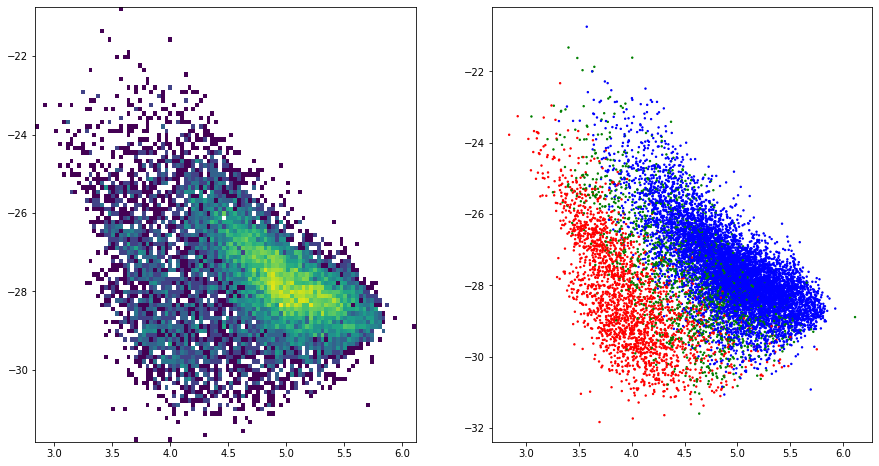

In [21]:
from matplotlib.colors import LogNorm
colors = {0:'red', 1:'green', 2:'blue'}
fig, ax=plt.subplots(1,2, figsize=(15,8))
ax[0].hist2d(P[:,0],P[:,1], bins=100, norm=LogNorm()) #vmax=30);
ax[1].scatter(P[:,0], P[:,1], c=Tab['type'].map(colors), s=2);

Voy a ver cómo afecta el redshift a este gráfico, sobre todo porque luego voy a usar ppal comps para los algoritmos y quizá sea conveniente hacer ventanas de redshift también. Voy a representar hasta z=1.7 porque luego los gráficos están básicamente vacíos.

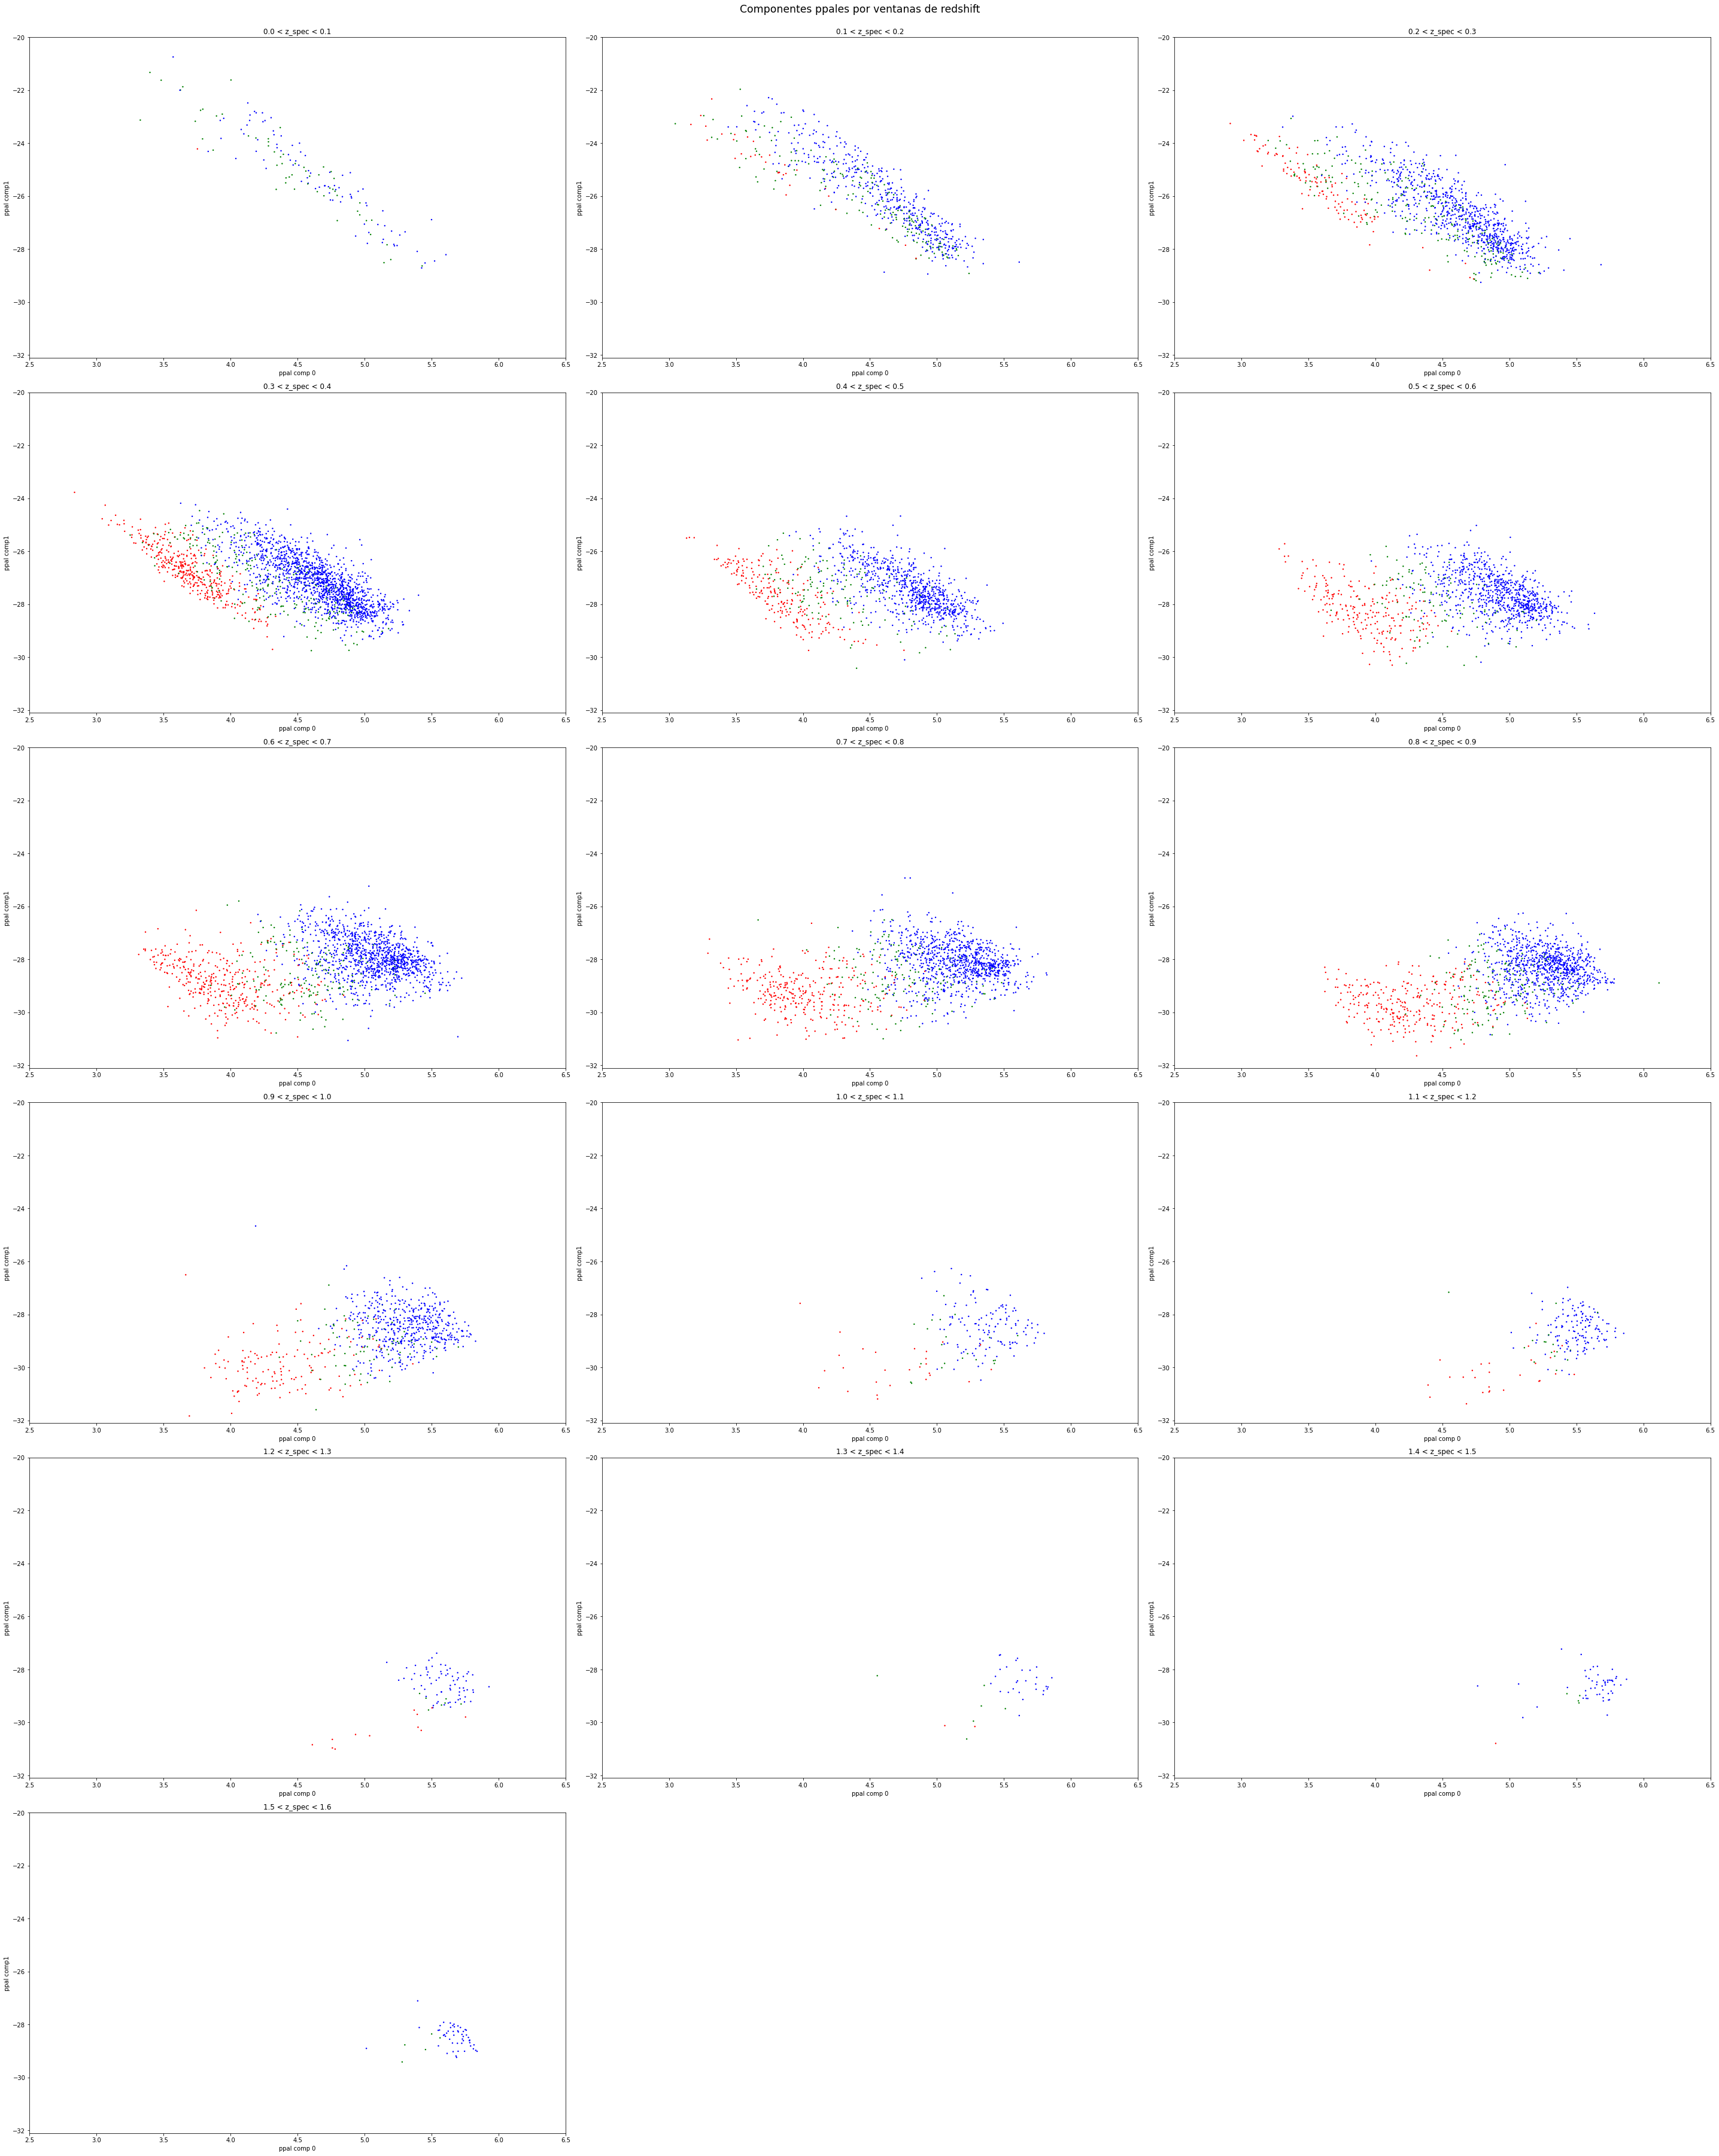

In [22]:
#Voy a representar las galaxias entre 0 y el máximo redshift zspec
z=np.arange(0,1.7,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(40,50))
plt.suptitle('Componentes ppales por ventanas de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    X=Tab.loc[(Tab['zspec']>z[j])&(Tab['zspec']<z[j+1])]
    plt.subplot(6, 3, j+1)
    plt.scatter(X[0], X[1], color=X['type'].map(colors), s=2)
    plt.xlim([2.5,6.5])
    plt.ylim([-32.1, -20])
    plt.xlabel('ppal comp 0')
    plt.ylabel('ppal comp1') 
    plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout();

In [23]:
z=np.arange(0,max(Tab['zspec']),.1)
z

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7])

In [24]:
for i in range(3):
    print(i)

0
1
2


---
---
---
# Algoritmos no supervisados ML

Usaremos algoritmos de Machine Learning para clasificar las galaxias.
Primero probamos con _Kmeans_

## _KMeans_
_KMeans_ trabaja con numpy arrays, tengo que convertir la tabla de interés de DataFrame.


Probar el algortimo con colores mag o colores y flujo i, probar también en otra ventana de redshift.

Cambiando solo las dos celdas de código de abajo, la definición del array para el algoritmo, puedo probar diferentes features de entrada para el algoritmo. **Notar que los plots los estoy guardando, pero se sobreescriben cada vez que corro el cuaderno**. Vamos a coger una **submuestra de galaxias de nuestro catálogo entre 0.55 - 0.6 zspec** para testar el algoritmo.

- 1º las  **_features_ de los datos de _KMeans_ serán solo los flujos normalizados de los filtros**. Después de ejecutarlo llegamos a una clasificación con clusters equidistantes, pero sin mayor relación , ni parecido con la clasificación del catálogo.
- 2º **_features_** serán colores y el flujo normalizado de la banda i. Voy a probar con los **colores de los gráficos, y el flujo i**.
- 3º puedo probar con las **magnitudes** en lugar de los flujos, es solo cambiar nfiltros $\longrightarrow$ magnitudes
- 4º probar con colores, resta de ellos consecutivamente. Y magnitud i

In [25]:
#esto toma una submuestra del catálogo para una ventana de redshift.
#Tabm=Tab.loc[(Tab['zspec']>0.55)&(Tab['zspec']<0.6)]
#Tabm[nfiltros] vale en total aquí hay 420 galaxias

In [26]:
#aquí seleccionamos las columnas de la submuestra que queremos y las convertimos a un array para el algoritmo.
#kmarray=Tabm[nfiltros].to_numpy() #del data frame submuestra cojo solo las columnas filtros para array kmeans

# KM=['V-J', 'u-V', 'r-K', 'u-r', 'n_i_Subaru'] #esto son los colores de los diagramas y el flujo i normalizado
# kmarray=Tabm[KM].to_numpy()

In [27]:
from sklearn.cluster import KMeans

In [28]:
#kmeans = KMeans(n_clusters=3, n_init=420, max_iter=10000)#n_init es número de veces con diferentes centroides seed.
#max_iter es el número de veces que se itera el algoritmo for a single run
#Galaxias entre 0.55 a 0.6 zspec poner %total
#Número óptimo de clusters

In [29]:
#kmeans.fit(kmarray)

In [30]:
#Tabm['KMtype'] = kmeans.labels_ #añado una nueva columna con la clasificación de KMeans

In [31]:
#Esto de abajo devuelve un array con las coordenadas de los centroides
#kmeans.cluster_centers_ #[0]sería el centroide del naranja, [1]amarillo, [2]morado, según la definición que hago más abajo.

In [32]:
#Genero un dataFrame con las posciones de los centroides #También hay que cambiarlo si se cambia los inputs, hay que modificar
#el columns, del Data Frame para que sean las columnas KM o nfiltros
# centroides = pd.DataFrame(kmeans.cluster_centers_, columns=KM)#nfiltros)
# print('Fila 0 es naranja, 1 amarillo, 2 morado')
# centroides

**Hay que cambiar la siguiente celda si se cambia la definición de kmarray para correr el algortimo con otros inputs, porque esto son las coordenadas de acuerdo a las variables de entrada** Dejo comentado el caso donde el input son los flujos normalizados. **También hay que cambiar las líneas correspondientes en los plots**
**Los diagramas cociente flujos no tienen la posición de los centroides, porque no tengo las coordenadas cociente flujos**

para ponerlos, como tengo las coordenadas colores sería $$\frac{f_1}{f_2} = 10^{\frac{m_1-m_2}{-2.5}}$$
y tenemos $m_1-m_2$

In [33]:
#añado al df columas que nos servirán para representar los centroides en los plots

#cuando usamos flujos normalizados como inputs
#centroides['u/V'] = centroides['n_u_cfht']/centroides['n_V_Subaru']
#centroides['V/J'] = centroides['n_V_Subaru']/centroides['n_J_uv']
#centroides['u/r'] = centroides['n_u_cfht']/centroides['n_r_Subaru']
#centroides['r/K'] = centroides['n_r_Subaru']/centroides['n_K_uv']
#centroides['B/r'] = centroides['n_B_Subaru']/centroides['n_r_Subaru']

#usando los colores como inputs
# centroides['u/V'] = 10**(centroides['u-V']/-2.5)
# centroides['V/J'] = 10**(centroides['V-J']/-2.5)
# centroides['u/r'] = 10**(centroides['u-r']/-2.5)
# centroides['r/K'] = 10**(centroides['r-K']/-2.5)

#usando magnitudes como inputs no tendría sentido hacer los gráficos con el cociente de los flujos.
#habría que hallar las coordenadas color haciendo las restas de las magnitudes de cada color. Serían 4 restas en total.

Ya tenemos la clasificación de KMeans hecha. Para comparar voy a ver cómo es la submuestra que hemos escogido vs la clasificación de KMeans. Represento un histograma de la submuestra.

In [34]:
# redm=Tabm.loc[Tabm['type']==0]
# greenm=Tabm.loc[Tabm['type']==1]
# bluem=Tabm.loc[Tabm['type']==2]

# plt.hist([redm['type'],greenm['type'],bluem['type']],bins=3, rwidth=1.2, color=['red','green','blue'])
# plt.xticks([0.1,1,1.9],['red','green','blue'])
# plt.xlabel('type')
# plt.ylabel('Número de galaxias')
# plt.title('Tipos de galaxias en submuestra para clasificación');
# print(Tabm.shape[0], ' galaxias totales en submuestra, que representan el', round(Tabm.shape[0]/Tab.shape[0]*100,2),'% de muestra total')
# print(redm.shape[0], ' rojas que son el ' ,round(redm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
# print(greenm.shape[0], ' verdes que son el ' ,round(greenm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
# print(bluem.shape[0], ' azules que son el ' , round(bluem.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
# plt.savefig('Plots/Histograma submuestra.png')
# #plt.hist(KMtype, bins=3, rwidth=0.4)

Vamos a identificar las galaxias clasificadas por KMeans:
- **0**: orange
- **1**: yellow
- **2**: purple

In [35]:
# orangem=Tabm.loc[Tabm['KMtype']==0]
# yellowm=Tabm.loc[Tabm['KMtype']==1]
# purplem=Tabm.loc[Tabm['KMtype']==2]

# plt.hist([orangem['KMtype'],yellowm['KMtype'],purplem['KMtype']],align='mid', bins=3, rwidth=1.2, color=['orange','yellow','purple'])
# plt.xticks([0.1,1,1.9],['orange','yellow','purple'])
# plt.xlabel('KMeans type')
# plt.ylabel('Número de galaxias')
# plt.title('KMeans tipos de galaxias submuestra');
# print(Tabm.shape[0], ' galaxias totales en submuestra')
# print(orangem.shape[0], ' naranjas que son el ' ,round(orangem.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
# print(yellowm.shape[0], ' amarillas que son el ' ,round(yellowm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
# print(purplem.shape[0], ' moradas que son el ' , round(purplem.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
# plt.savefig('Plots/Histograma submuestra KMeans.png')

In [36]:
#Esto es una manera alternativa de hacer el historgrama, para pelear de otra forma con los bins y rwidth... :|
#plt.hist(orangem['KMtype'], bins=1, rwidth=0.33, color='orange')
#plt.hist(yellowm['KMtype'], bins=1, rwidth=0.33, color='yellow')
#plt.hist(purplem['KMtype'], bins=1, rwidth=0.33, color='purple')
#plt.xticks([0,1,2],['orange','yellow','purple'])
#plt.xlabel('KMeans type')
#plt.ylabel('Número de galaxias')
#plt.title('KMeans tipos de galaxias submuestra');

Ahora voy a representar los diagramas color-color de los paper con la clasificación por colores de KMeans. Cruzamos los dedos para esperar algo parecido, aunque a la vista de los histogramas no será.

In [37]:
#Tabm[nfiltros]

In [38]:
#fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#ax[0].scatter(redm['V/J'],redm['u/V'],color='r',s=3)
#ax[0].scatter(bluem['V/J'],bluem['u/V'],color='b',s=3)
#
#ax[1].scatter(yellowm['V/J'],yellowm['u/V'],color='yellow',s=3)
##ax[1].scatter(centroides.iloc[1]['V/J'], centroides.iloc[1]['u/V'], color='yellow', edgecolors='black', s=100)
#ax[1].scatter(centroides.iloc[2]['V/J'], centroides.iloc[2]['u/V'], color='purple', edgecolors='black', s=100)


#ax[1].set_title('KMeans')
#ax[1].set_xlabel('V / J')
#ax[1].set_ylabel('u / V')

#fig.suptitle('Diagrama uVJ cociente flujos')
#fig.savefig('Plots/Diagrama uVJ cociente flujos.png');


In [39]:
# fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ax[0].scatter(-2.5*np.log10([redm['V/J']]), -2.5*np.log10([redm['u/V']]),color='r',s=3)
# ax[0].scatter(-2.5*np.log10([bluem['V/J']]), -2.5*np.log10([bluem['u/V']]),color='b',s=3)
# ax[0].scatter(-2.5*np.log10([greenm['V/J']]), -2.5*np.log10([greenm['u/V']]),color='g',s=3)
# ax[0].set_title('Catálogo')
# ax[0].set_xlabel('V - J')
# ax[0].set_ylabel('u - V')

# ax[1].scatter(-2.5*np.log10([orangem['V/J']]), -2.5*np.log10([orangem['u/V']]),color='orange',s=3)
# ax[1].scatter(-2.5*np.log10([purplem['V/J']]), -2.5*np.log10([purplem['u/V']]),color='purple',s=3)
# ax[1].scatter(-2.5*np.log10([yellowm['V/J']]), -2.5*np.log10([yellowm['u/V']]),color='yellow',s=3)
# #añadir posición de centroides, varían en funcióon de inputs algoritmo 
# #ax[1].scatter(-2.5*np.log10(centroides.iloc[0]['V/J']), -2.5*np.log10(centroides.iloc[0]['u/V']), color='orange', edgecolors='black', s=100)
# #ax[1].scatter(-2.5*np.log10(centroides.iloc[1]['V/J']), -2.5*np.log10(centroides.iloc[1]['u/V']), color='yellow', edgecolors='black', s=100)
# #ax[1].scatter(-2.5*np.log10(centroides.iloc[2]['V/J']), -2.5*np.log10(centroides.iloc[2]['u/V']), color='purple', edgecolors='black', s=100)
# ax[1].scatter(centroides.iloc[0]['V-J'], centroides.iloc[0]['u-V'], color='orange', edgecolors='black', s=100)
# ax[1].scatter(centroides.iloc[1]['V-J'], centroides.iloc[1]['u-V'], color='yellow', edgecolors='black', s=100)
# ax[1].scatter(centroides.iloc[2]['V-J'], centroides.iloc[2]['u-V'], color='purple', edgecolors='black', s=100)


# ax[1].set_title('KMeans')
# ax[1].set_xlabel('V - J')
# ax[1].set_ylabel('u - V')
# fig.suptitle('Diagrama uVJ Pogson')
# fig.savefig('Plots/Diagrama uVJ Pogson.png');

In [40]:
#fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#ax[0].scatter(redm['r/K'], redm['u/r'],color='r',s=3)
#ax[0].scatter(bluem['r/K'], bluem['u/r'],color='b',s=3)
#ax[0].scatter(greenm['r/K'], greenm['u/r'],color='g',s=3)
#ax[0].set_title('Catálogo')
#ax[0].set_xlabel('r / K')
#ax[0].set_ylabel('u / r')
#
#ax[1].scatter(orangem['r/K'], orangem['u/r'],color='orange',s=3)
#ax[1].scatter(purplem['r/K'], purplem['u/r'],color='purple',s=3)
#ax[1].scatter(yellowm['r/K'], yellowm['u/r'],color='yellow',s=3)
##posición centroides
#ax[1].scatter(centroides.iloc[0]['r/K'], centroides.iloc[0]['u/r'], color='orange', edgecolors='black', s=100)
#ax[1].scatter(centroides.iloc[1]['r/K'], centroides.iloc[1]['u/r'], color='yellow', edgecolors='black', s=100)
#ax[1].scatter(centroides.iloc[2]['r/K'], centroides.iloc[2]['u/r'], color='purple', edgecolors='black', s=100)
#
#
#ax[1].set_title('KMeans')
#ax[1].set_xlabel('r / K')
#ax[1].set_ylabel('u / r')
#
#fig.suptitle('Diagrama urK cociente flujos')
#fig.savefig('Plots/Diagrama urK cociente flujos.png');

In [41]:
# fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# ax[0].scatter(-2.5*np.log10([redm['r/K']]), -2.5*np.log10([redm['u/r']]),color='r',s=3)
# ax[0].scatter(-2.5*np.log10([bluem['r/K']]), -2.5*np.log10([bluem['u/r']]),color='b',s=3)
# ax[0].scatter(-2.5*np.log10([greenm['r/K']]), -2.5*np.log10([greenm['u/r']]),color='g',s=3)
# ax[0].set_title('Catálogo')
# ax[0].set_xlabel('r - K')
# ax[0].set_ylabel('u - r')

# ax[1].scatter(-2.5*np.log10([orangem['r/K']]), -2.5*np.log10([orangem['u/r']]),color='orange',s=3)
# ax[1].scatter(-2.5*np.log10([purplem['r/K']]), -2.5*np.log10([purplem['u/r']]),color='purple',s=3)
# ax[1].scatter(-2.5*np.log10([yellowm['r/K']]), -2.5*np.log10([yellowm['u/r']]),color='yellow',s=3)
# #posición centroides
# #ax[1].scatter(-2.5*np.log10(centroides.iloc[0]['r/K']), -2.5*np.log10(centroides.iloc[0]['u/r']), color='orange', edgecolors='black', s=100)
# #ax[1].scatter(-2.5*np.log10(centroides.iloc[1]['r/K']), -2.5*np.log10(centroides.iloc[1]['u/r']), color='yellow', edgecolors='black', s=100)
# #ax[1].scatter(-2.5*np.log10(centroides.iloc[2]['r/K']), -2.5*np.log10(centroides.iloc[2]['u/r']), color='purple', edgecolors='black', s=100)
# ax[1].scatter(centroides.iloc[0]['r-K'], centroides.iloc[0]['u-r'], color='orange', edgecolors='black', s=100)
# ax[1].scatter(centroides.iloc[1]['r-K'], centroides.iloc[1]['u-r'], color='yellow', edgecolors='black', s=100)
# ax[1].scatter(centroides.iloc[2]['r-K'], centroides.iloc[2]['u-r'], color='purple', edgecolors='black', s=100)


# ax[1].set_title('KMeans')
# ax[1].set_xlabel('r - K')
# ax[1].set_ylabel('u - r')
# fig.suptitle('Diagrama urK Pogson')
# fig.savefig('Plots/Diagrama urK Pogson.png');

### KMeans con inputs colores filtros consecutivos

In [42]:
Tabm=Tab.loc[(Tab['zspec']>0.55)&(Tab['zspec']<0.6)] #escoger submuestra
kmarray=Tabm[colores].to_numpy() #determinar inputs para algortimo, aquí colores consecutivos
kmeans = KMeans(n_clusters=3, n_init=420, max_iter=10000)
kmeans.fit(kmarray)
Tabm['KMtypecolors'] = kmeans.labels_ 
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=colores)
print('Fila 0 es naranja, 1 amarillo, 2 morado')
centroides

Fila 0 es naranja, 1 amarillo, 2 morado


C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\3784800498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabm['KMtypecolors'] = kmeans.labels_


,u-B,B-V,V-r,r-i,i-z,z-Y,Y-J,J-H,H-K
0,0.127161,0.332015,0.470464,0.366756,0.120135,0.261395,0.036378,0.191980,0.091658
1,1.169823,1.188293,0.852835,0.868565,0.415028,0.218949,0.359017,0.348102,0.202619
2,0.446656,0.650479,0.682499,0.629054,0.354718,0.275034,0.255610,0.380783,0.232224


In [43]:
#COORDENADAS CENTROIDES PARA PLOTS: añado al data frame las columnas necesarias
centroides['u-V']=centroides['u-B']+centroides['B-V']
centroides['u-r']=centroides['u-B']+centroides['B-V']+centroides['V-r']
centroides['V-J']=centroides['V-r']+centroides['r-i']+centroides['i-z']+centroides['z-Y']+centroides['Y-J']
centroides['r-K']=centroides['r-i']+centroides['i-z']+centroides['z-Y']+centroides['Y-J']+centroides['J-H']+centroides['H-K']
centroides

,u-B,B-V,V-r,r-i,i-z,z-Y,Y-J,J-H,H-K,u-V,u-r,V-J,r-K
0,0.127161,0.332015,0.470464,0.366756,0.120135,0.261395,0.036378,0.191980,0.091658,0.459176,0.929640,1.255128,1.068301
1,1.169823,1.188293,0.852835,0.868565,0.415028,0.218949,0.359017,0.348102,0.202619,2.358116,3.210951,2.714395,2.412280
2,0.446656,0.650479,0.682499,0.629054,0.354718,0.275034,0.255610,0.380783,0.232224,1.097135,1.779634,2.196915,2.127423


420  galaxias totales en submuestra, que representan el 3.47 % de muestra total
84  rojas que son el  20.0 % de submuestra
35  verdes que son el  8.33 % de submuestra
301  azules que son el  71.67 % de submuestra


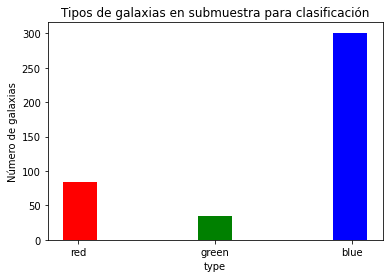

In [44]:
redm=Tabm.loc[Tabm['type']==0]
greenm=Tabm.loc[Tabm['type']==1]
bluem=Tabm.loc[Tabm['type']==2]

plt.hist([redm['type'],greenm['type'],bluem['type']],bins=3, rwidth=1.2, color=['red','green','blue'])
plt.xticks([0.1,1,1.9],['red','green','blue'])
plt.xlabel('type')
plt.ylabel('Número de galaxias')
plt.title('Tipos de galaxias en submuestra para clasificación');
print(Tabm.shape[0], ' galaxias totales en submuestra, que representan el', round(Tabm.shape[0]/Tab.shape[0]*100,2),'% de muestra total')
print(redm.shape[0], ' rojas que son el ' ,round(redm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
print(greenm.shape[0], ' verdes que son el ' ,round(greenm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
print(bluem.shape[0], ' azules que son el ' , round(bluem.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
#plt.savefig('Plots/Histograma submuestra.png')
#plt.hist(KMtype, bins=3, rwidth=0.4)

420  galaxias totales en submuestra
222  naranjas que son el  52.86 % de submuestra
79  amarillas que son el  18.81 % de submuestra
119  moradas que son el  28.33 % de submuestra


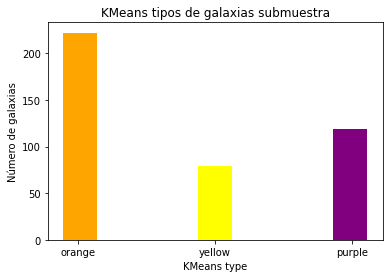

In [45]:
orangem=Tabm.loc[Tabm['KMtypecolors']==0]
yellowm=Tabm.loc[Tabm['KMtypecolors']==1]
purplem=Tabm.loc[Tabm['KMtypecolors']==2]

plt.hist([orangem['KMtypecolors'],yellowm['KMtypecolors'],purplem['KMtypecolors']],align='mid', bins=3, rwidth=1.2, color=['orange','yellow','purple'])
plt.xticks([0.1,1,1.9],['orange','yellow','purple'])
plt.xlabel('KMeans type')
plt.ylabel('Número de galaxias')
plt.title('KMeans tipos de galaxias submuestra');
print(Tabm.shape[0], ' galaxias totales en submuestra')
print(orangem.shape[0], ' naranjas que son el ' ,round(orangem.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
print(yellowm.shape[0], ' amarillas que son el ' ,round(yellowm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
print(purplem.shape[0], ' moradas que son el ' , round(purplem.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
plt.savefig('Plots/Histograma submuestra KMeans colores consecutivos.png')

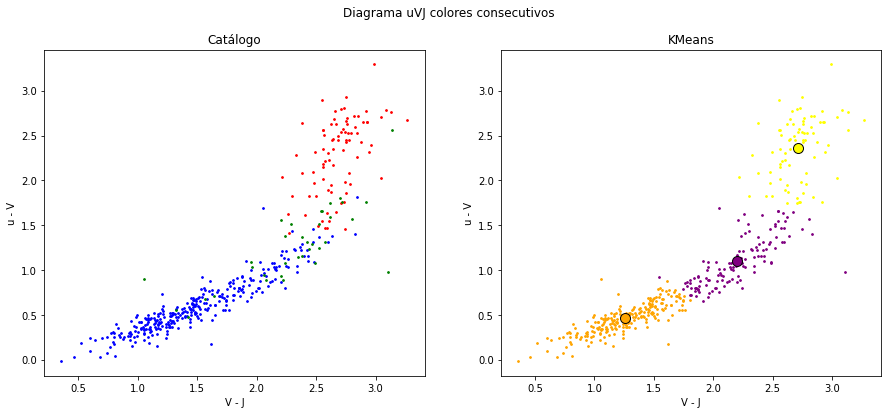

In [46]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax[0].scatter(-2.5*np.log10([redm['V/J']]), -2.5*np.log10([redm['u/V']]),color='r',s=3)
ax[0].scatter(-2.5*np.log10([bluem['V/J']]), -2.5*np.log10([bluem['u/V']]),color='b',s=3)
ax[0].scatter(-2.5*np.log10([greenm['V/J']]), -2.5*np.log10([greenm['u/V']]),color='g',s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('V - J')
ax[0].set_ylabel('u - V')

ax[1].scatter(-2.5*np.log10([orangem['V/J']]), -2.5*np.log10([orangem['u/V']]),color='orange',s=3)
ax[1].scatter(-2.5*np.log10([purplem['V/J']]), -2.5*np.log10([purplem['u/V']]),color='purple',s=3)
ax[1].scatter(-2.5*np.log10([yellowm['V/J']]), -2.5*np.log10([yellowm['u/V']]),color='yellow',s=3)
#centroides
ax[1].scatter(centroides.iloc[0]['V-J'], centroides.iloc[0]['u-V'], color='orange', edgecolors='black', s=100)
ax[1].scatter(centroides.iloc[1]['V-J'], centroides.iloc[1]['u-V'], color='yellow', edgecolors='black', s=100)
ax[1].scatter(centroides.iloc[2]['V-J'], centroides.iloc[2]['u-V'], color='purple', edgecolors='black', s=100)



ax[1].set_title('KMeans')
ax[1].set_xlabel('V - J')
ax[1].set_ylabel('u - V')
fig.suptitle('Diagrama uVJ colores consecutivos')
fig.savefig('Plots/Diagrama uVJ colores consecutivos.png');

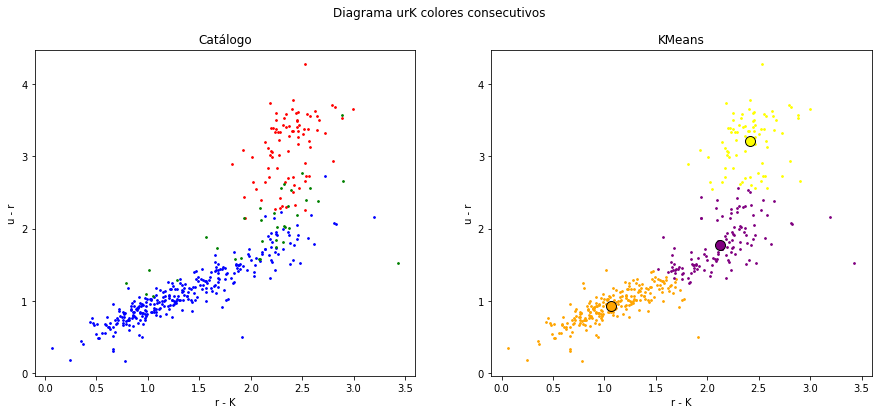

In [47]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].scatter(-2.5*np.log10([redm['r/K']]), -2.5*np.log10([redm['u/r']]),color='r',s=3)
ax[0].scatter(-2.5*np.log10([bluem['r/K']]), -2.5*np.log10([bluem['u/r']]),color='b',s=3)
ax[0].scatter(-2.5*np.log10([greenm['r/K']]), -2.5*np.log10([greenm['u/r']]),color='g',s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(-2.5*np.log10([orangem['r/K']]), -2.5*np.log10([orangem['u/r']]),color='orange',s=3)
ax[1].scatter(-2.5*np.log10([purplem['r/K']]), -2.5*np.log10([purplem['u/r']]),color='purple',s=3)
ax[1].scatter(-2.5*np.log10([yellowm['r/K']]), -2.5*np.log10([yellowm['u/r']]),color='yellow',s=3)
#centroides
ax[1].scatter(centroides.iloc[0]['r-K'], centroides.iloc[0]['u-r'], color='orange', edgecolors='black', s=100)
ax[1].scatter(centroides.iloc[1]['r-K'], centroides.iloc[1]['u-r'], color='yellow', edgecolors='black', s=100)
ax[1].scatter(centroides.iloc[2]['r-K'], centroides.iloc[2]['u-r'], color='purple', edgecolors='black', s=100)


ax[1].set_title('KMeans')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
fig.suptitle('Diagrama urK colores consecutivos')
fig.savefig('Figuras para Latex/No supervisados/k-means/urK3clustersconseccol.png');

### Número óptimo de clusters _Elbow method_
Vamos a comprobar cual es el número óptimo de clusters usando _elbow method_ que calcula la distancia media de los puntos a los centroides para diferente número de clusters. Para un número de clusters concreto esta distancia debería caer súbitamente. Ese número de clusters sería el óptimo. Hay un atributo de Kmeans de scikit que devuelve la distancia que buscamos _inertia__

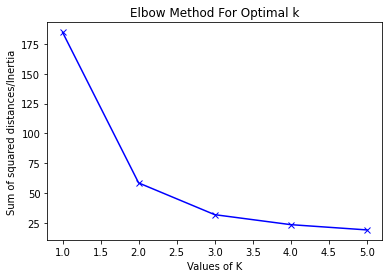

In [48]:
#estamos usando los inputs que haya en kmarray!!!!
Sum_of_squared_distances = []
K = range(1,6)
for num_clusters in K :
 kmean = KMeans(n_clusters=num_clusters)#, n_init=420, max_iter=10000)
 kmean.fit(kmarray)
 Sum_of_squared_distances.append(kmean.inertia_)


plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.savefig('Figuras para Latex/No supervisados/k-means/Methods/elbow.png');

### Método de silueta
The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). Cada punto (galaxia) tiene un coeficiente que tiene en cuenta la distancia a los demás puntos de su mismo cluster, y la distancia al resto de puntos (de otros clusters). Se calcula el valor medio de ese coeficiente para todos los puntos. Usamos también un paquete de _sklearn_

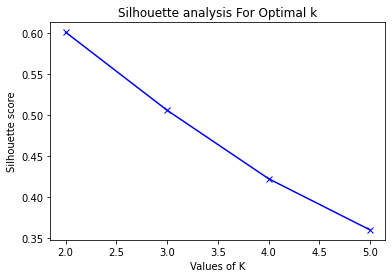

In [49]:
#inputs para el algoritmo que haya en kmarray!!!
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(kmarray)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(kmarray, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.savefig('Figuras para Latex/No supervisados/k-means/Methods/silhouette.png');

### Vamos a probar a clasificar las galaxias en 2 clusters con _KMeans_.

In [50]:
Tabm=Tab.loc[(Tab['zspec']>0.55)&(Tab['zspec']<0.6)]
kmarray=Tabm[colores].to_numpy()
kmeans = KMeans(n_clusters=2, n_init=420, max_iter=10000)
kmeans.fit(kmarray)#la última definición de kmarray son los colores consecutivos
#tipos=kmeans.labels_ #OJITO
Tabm['KM2typecolors'] = kmeans.labels_ #columna nueva con clasificación en 2 tipos
#ahora va el dataFrame con las posiciones de los centroides, que hay que cambiar si cambian los inputs
centroides2 = pd.DataFrame(kmeans.cluster_centers_, columns=colores)#KM)#nfiltros) #dataframe con posición de los 2 centroides
#'Fila 0 es naranja, 1 morado'
#columnas nuevas en df 2centroides, esto cambia si cambian los inputs del algoritmo
#centroides2['u/V'] = centroides2['n_u_cfht']/centroides2['n_V_Subaru']
#centroides2['V/J'] = centroides2['n_V_Subaru']/centroides2['n_J_uv']
#centroides2['u/r'] = centroides2['n_u_cfht']/centroides2['n_r_Subaru']
#centroides2['r/K'] = centroides2['n_r_Subaru']/centroides2['n_K_uv']
#centroides2['B/r'] = centroides2['n_B_Subaru']/centroides2['n_r_Subaru']
#centroides2['u/V'] = 10**(centroides2['u-V']/-2.5)
#centroides2['V/J'] = 10**(centroides2['V-J']/-2.5)
#centroides2['u/r'] = 10**(centroides2['u-r']/-2.5)
#centroides2['r/K'] = 10**(centroides2['r-K']/-2.5)
centroides2

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\1049992310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabm['KM2typecolors'] = kmeans.labels_ #columna nueva con clasificación en 2 tipos


,u-B,B-V,V-r,r-i,i-z,z-Y,Y-J,J-H,H-K
0,0.185358,0.384215,0.511714,0.414722,0.169019,0.266397,0.080476,0.234444,0.123721
1,0.946845,1.047859,0.814211,0.817188,0.412514,0.235992,0.342826,0.369096,0.219171


In [51]:
#COORDENADAS CENTROIDES PARA PLOTS: añado al data frame las columnas necesarias
centroides2['u-V']=centroides2['u-B']+centroides2['B-V']
centroides2['u-r']=centroides2['u-B']+centroides2['B-V']+centroides2['V-r']
centroides2['V-J']=centroides2['V-r']+centroides2['r-i']+centroides2['i-z']+centroides2['z-Y']+centroides2['Y-J']
centroides2['r-K']=centroides2['r-i']+centroides2['i-z']+centroides2['z-Y']+centroides2['Y-J']+centroides2['J-H']+centroides2['H-K']
centroides2

,u-B,B-V,V-r,r-i,i-z,z-Y,Y-J,J-H,H-K,u-V,u-r,V-J,r-K
0,0.185358,0.384215,0.511714,0.414722,0.169019,0.266397,0.080476,0.234444,0.123721,0.569573,1.081286,1.442327,1.288779
1,0.946845,1.047859,0.814211,0.817188,0.412514,0.235992,0.342826,0.369096,0.219171,1.994705,2.808916,2.622732,2.396787


420  galaxias totales en submuestra
294  rosas que son el  70.0 % de submuestra
126  marrones que son el  30.0 % de submuestra


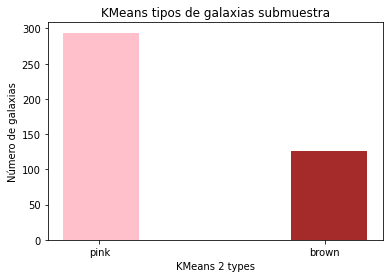

In [52]:
#defino mis dos colores para la nueva clasificación de KMeans, igual es conveniente no usar los mismos colores
pinkm=Tabm.loc[Tabm['KM2typecolors']==0]
brownm=Tabm.loc[Tabm['KM2typecolors']==1]
#histograma
plt.hist([pinkm['KM2typecolors'],brownm['KM2typecolors']],align='mid', bins=2, rwidth=1.2, color=['pink','brown'])
plt.xticks([0.12,0.86],['pink','brown'])
plt.xlabel('KMeans 2 types')
plt.ylabel('Número de galaxias')
plt.title('KMeans tipos de galaxias submuestra');
print(Tabm.shape[0], ' galaxias totales en submuestra')
print(pinkm.shape[0], ' rosas que son el ' ,round(pinkm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
print(brownm.shape[0], ' marrones que son el ' , round(brownm.shape[0]/Tabm.shape[0]*100,2), '% de submuestra')
plt.savefig('Plots/Histograma submuestra 2 tipos KMeans colores consecutivos.png')

In [53]:
# fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# ax[0].scatter(redm['V/J'],redm['u/V'],color='r',s=3)
# ax[0].scatter(bluem['V/J'],bluem['u/V'],color='b',s=3)
# ax[0].scatter(greenm['V/J'],greenm['u/V'],color='g',s=3)
# ax[0].set_title('Catálogo')
# ax[0].set_xlabel('V / J')
# ax[0].set_ylabel('u / V');

# ax[1].scatter(pinkm['V/J'],pinkm['u/V'],color='pink',s=3)
# ax[1].scatter(brownm['V/J'],brownm['u/V'],color='brown',s=3)
# #posición centroides cambia al cambiar inputsss
# ax[1].scatter(centroides2.iloc[0]['V/J'], centroides2.iloc[0]['u/V'], color='pink', edgecolors='black', s=100)
# ax[1].scatter(centroides2.iloc[1]['V/J'], centroides2.iloc[1]['u/V'], color='brown', edgecolors='black', s=100)

# ax[1].set_title('KMeans')
# ax[1].set_xlabel('V / J')
# ax[1].set_ylabel('u / V')

# fig.suptitle('Diagrama uVJ cociente flujos');
# fig.savefig('Plots/2 Clust Diagrama uVJ cociente flujos.png');


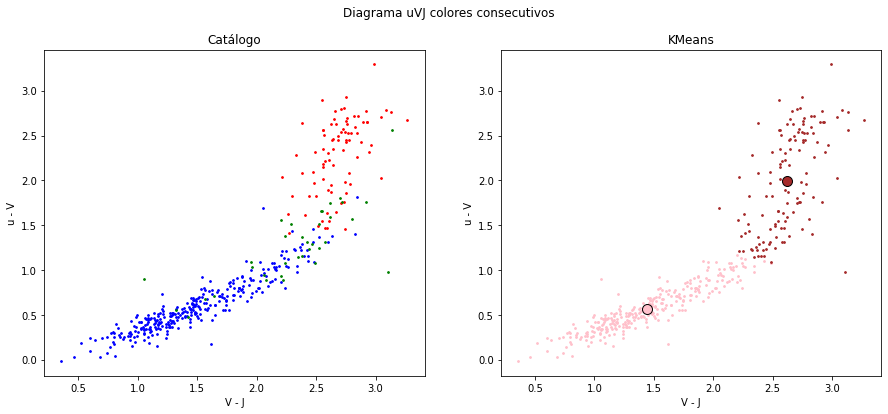

In [54]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax[0].scatter(-2.5*np.log10([redm['V/J']]), -2.5*np.log10([redm['u/V']]),color='r',s=3)
ax[0].scatter(-2.5*np.log10([bluem['V/J']]), -2.5*np.log10([bluem['u/V']]),color='b',s=3)
ax[0].scatter(-2.5*np.log10([greenm['V/J']]), -2.5*np.log10([greenm['u/V']]),color='g',s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('V - J')
ax[0].set_ylabel('u - V')

ax[1].scatter(-2.5*np.log10([pinkm['V/J']]), -2.5*np.log10([pinkm['u/V']]),color='pink',s=3)
ax[1].scatter(-2.5*np.log10([brownm['V/J']]), -2.5*np.log10([brownm['u/V']]),color='brown',s=3)
#añadir posición de centroides
ax[1].scatter(centroides2.iloc[0]['V-J'], centroides2.iloc[0]['u-V'], color='pink', edgecolors='black', s=100)
ax[1].scatter(centroides2.iloc[1]['V-J'], centroides2.iloc[1]['u-V'], color='brown', edgecolors='black', s=100)
#ax[1].scatter(-2.5*np.log10(centroides2.iloc[0]['V/J']), -2.5*np.log10(centroides2.iloc[0]['u/V']), color='pink', edgecolors='black', s=100)
#ax[1].scatter(-2.5*np.log10(centroides2.iloc[1]['V/J']), -2.5*np.log10(centroides2.iloc[1]['u/V']), color='brown', edgecolors='black', s=100)
# ax[1].scatter(centroides2.iloc[0]['V-J'], centroides2.iloc[0]['u-V'], color='pink', edgecolors='black', s=100)
# ax[1].scatter(centroides2.iloc[1]['V-J'], centroides2.iloc[1]['u-V'], color='brown', edgecolors='black', s=100)


ax[1].set_title('KMeans')
ax[1].set_xlabel('V - J')
ax[1].set_ylabel('u - V')
fig.suptitle('Diagrama uVJ colores consecutivos');
fig.savefig('Plots/2 Clust Diagrama uVJ colores consecutivos.png');

In [55]:
# fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# ax[0].scatter(redm['r/K'], redm['u/r'],color='r',s=3)
# ax[0].scatter(bluem['r/K'], bluem['u/r'],color='b',s=3)
# ax[0].scatter(greenm['r/K'], greenm['u/r'],color='g',s=3)
# ax[0].set_title('Catálogo')
# ax[0].set_xlabel('r / K')
# ax[0].set_ylabel('u / r')

# ax[1].scatter(pinkm['r/K'], pinkm['u/r'],color='pink',s=3)
# ax[1].scatter(brownm['r/K'], brownm['u/r'],color='brown',s=3)
# #posición centroides
# ax[1].scatter(centroides2.iloc[0]['r/K'], centroides2.iloc[0]['u/r'], color='pink', edgecolors='black', s=100)
# ax[1].scatter(centroides2.iloc[1]['r/K'], centroides2.iloc[1]['u/r'], color='brown', edgecolors='black', s=100)


# ax[1].set_title('KMeans')
# ax[1].set_xlabel('r / K')
# ax[1].set_ylabel('u / r')

# fig.suptitle('Diagrama urK cociente flujos')
# fig.savefig('Plots/2 Clust Diagrama urK cociente flujos.png');

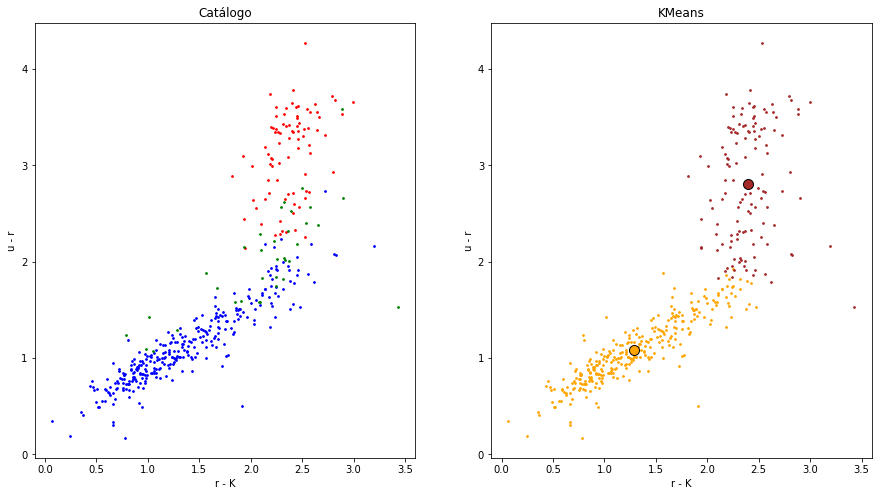

In [56]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax[0].scatter(-2.5*np.log10([redm['r/K']]), -2.5*np.log10([redm['u/r']]),color='r',s=3)
ax[0].scatter(-2.5*np.log10([bluem['r/K']]), -2.5*np.log10([bluem['u/r']]),color='b',s=3)
ax[0].scatter(-2.5*np.log10([greenm['r/K']]), -2.5*np.log10([greenm['u/r']]),color='g',s=3)
ax[0].set_title('Catálogo')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(-2.5*np.log10([pinkm['r/K']]), -2.5*np.log10([pinkm['u/r']]),color='orange',s=3)
ax[1].scatter(-2.5*np.log10([brownm['r/K']]), -2.5*np.log10([brownm['u/r']]),color='brown',s=3)
#posición centroides
ax[1].scatter(centroides2.iloc[0]['r-K'], centroides2.iloc[0]['u-r'], color='orange', edgecolors='black', s=100)
ax[1].scatter(centroides2.iloc[1]['r-K'], centroides2.iloc[1]['u-r'], color='brown', edgecolors='black', s=100)
#ax[1].scatter(-2.5*np.log10(centroides2.iloc[0]['r/K']), -2.5*np.log10(centroides2.iloc[0]['u/r']), color='pink', edgecolors='black', s=100)
#ax[1].scatter(-2.5*np.log10(centroides2.iloc[1]['r/K']), -2.5*np.log10(centroides2.iloc[1]['u/r']), color='brown', edgecolors='black', s=100)
# ax[1].scatter(centroides2.iloc[0]['r-K'], centroides2.iloc[0]['u-r'], color='pink', edgecolors='black', s=100)
# ax[1].scatter(centroides2.iloc[1]['r-K'], centroides2.iloc[1]['u-r'], color='brown', edgecolors='black', s=100)


ax[1].set_title('KMeans')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
#fig.suptitle('Diagrama urK colores consecutivos');
import matplotlib as mp
plt.savefig('Figuras para Latex/No supervisados/k-means/urk2colconsectest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,8));
plt.savefig('Figuras para Latex/No supervisados/k-means/urk2colconsecpred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,8));

### Bondad de la clasificación
Vamos a usar la matriz de confusión para hacernos una idea de lo buena que es la clasificación. Viendo los diagramas color-color vamos a asociar los colores/tipos de la clasificación del algoritmo con cada uno de los tipos del catálogo. 

No sé si tiene sentido intentar hacer esto con la clasificación en tres tipos, claramente el tipo intermedio NO corresponde con las galaxias 'verdes'. Es una mezcla de ambos, y a la vez, los otros dos parece que darían una clasificación prácticamente perfecta. La fuente de error sería claramente este grupo intermedio.

Por tanto intento aplicar la matriz de confusión a la clasificación en 2 cluster con KMeans. Además ya hemos visto usando el _elbow method_ y el _silhouette method_ que el número óptimo de clusters en nuestro caso son dos.

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#tengo la columna de clasificación del catálogo 'type'
# red=Tab.loc[Tab['type']==0]
# green=Tab.loc[Tab['type']==1]
# blue=Tab.loc[Tab['type']==2]
#Por otro lado tengo la columna con la clasificación con KMeans en 2 clusters 
# pinkm=Tabm.loc[Tabm['KM2typecolors']==0]
# brownm=Tabm.loc[Tabm['KM2typecolors']==1]

A _confusion_matrix_ se le da un array con los valores target, que será la columna 'type' del catálogo. Y otro array con la clasificación del algoritmo.
#### Problema asociación de tipos de KMeans con tipos de catálogo:
Los plots color-color permiten identificar a ojo, con bastante claridad, la clasificación de KM, con los colores rojo o azul del catálogo. Pero no se puede pasar el array 'KM2typecolors' directamente a la matriz de confusión. La matriz de confusión compara los tipo 0, 1 o 2 con los tipos 0, 1, ... de la clasificación. Pero cada vez que corro el algoritmo, se toma un punto incial distinto, y ocurre que no siempre el tipo 0, son lo que llamaríamos 'rojas' o 'azules'. Se pueden intercambiar. Tengo que hacer algo para asegurarme de que el KMtipo 0 o 1 coincida con los tipos 0(rojo) o 2(azul) siempre.

Vamos a probar a asociar los tipos, según la posición de los centroides. Parece, a la vista de los plots color-color para diferentes ventanas de redshift, que la coordenada u-r siempre será mayor en las galaxias tipo rojo. Por tanto, la idea es determinar la coordenada u-r de los centroides, y a la que sea mayor asociarle la correspondencia con el tipo rojo. Después alterar el array kmeans.labels para que sea comparable con la columna type del catálogo. Esto es, que el tipo 0 sea el rojo, y las azules sean 2. Nos olvidamos de clasificar las verdes.

In [58]:
# arrai=[0,0,2,0,0,0,0,0,2,2]
# for i in range(len(arrai)):
#     if arrai[i]==0:
#         arrai[i]=2
#         continue 
#     if arrai[i]==2:
#         arrai[i]=0

In [59]:
# arrai

In [60]:
tipos = kmeans.labels_
tipos[0:10]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [61]:
##REDEFINICIÓN KMEANS.LABELS >> KM2typecolors con posición CENTROIDES

#centroides2.iloc[0]['u-B'] #también vale [0,8] 0 es la primera fila, el segundo índice coge la columna 9
#tipos = kmeans.labels_
#tipos[0:10]
if centroides2.iloc[0]['u-r']>centroides2.iloc[1]['u-r']: #esto es que las tipo 0 del algortimo serán las rojas
    #solo hay que cambiar los 1 por 2
    for i in range(len(tipos)):
        if tipos[i]==1:
            tipos[i]=2 

if centroides2.iloc[0]['u-r']<centroides2.iloc[1]['u-r']:#esto es que las tipo 0 del algoritmo son las azules
    for i in range(len(tipos)):
        if tipos[i]==0:
            tipos[i]=2
            continue
        if tipos[i]==1:
            tipos[i]=0
tipos[0:10]

array([0, 2, 0, 2, 2, 2, 0, 2, 2, 2])

In [62]:
confusion_matrix(Tabm['type'],tipos)#, labels=[0, 2]) esto último selecciona los grupos que queremos comparar
#en el caso escrito 0, 2 devolvería la matriz de confusión solo para las galaxias 0 y 2 (una matriz 2x2).

array([[ 84,   0,   0],
       [ 22,   0,  13],
       [ 20,   0, 281]], dtype=int64)

In [63]:
confusion_matrix(Tabm['type'],tipos)[2,2]

281

La columna intermedia siempre será todo 0, porque el algoritmo no clasifica nada como verde. Lógicamente la suma de todos los elementos tiene que ser igual al número de elementos en la submuestra total. **OJO** porque parece que la matriz está al revés que en la página **La matriz de confusión y sus métricas**. Aquí cada fila 0:verdaderas rojas, 1:verdaderas verdes, 2: verdaderas azules. En la página los valores verdaderos son las columnas.

In [64]:
sum(sum(confusion_matrix(Tabm['type'],tipos))) #La suma de todos los elementos matriz tiene que ser igual a muestra (420 ahora) 

420

In [65]:
print(confusion_matrix(Tabm['type'],tipos)[0,0], 'rojas han sido clasificadas como rojas\n',
confusion_matrix(Tabm['type'],tipos)[0,2],'rojas han sido clasificadas como azules\n', 
confusion_matrix(Tabm['type'],tipos)[1,0],'verdes han sido clasificadas como rojas\n',
confusion_matrix(Tabm['type'],tipos)[1,2],'verdes han sido clasificadas como azules\n',
confusion_matrix(Tabm['type'],tipos)[2,0],'azules han sido clasificadas como rojas\n',
confusion_matrix(Tabm['type'],tipos)[2,2],'azules han sido clasificadas como azules')

84 rojas han sido clasificadas como rojas
 0 rojas han sido clasificadas como azules
 22 verdes han sido clasificadas como rojas
 13 verdes han sido clasificadas como azules
 20 azules han sido clasificadas como rojas
 281 azules han sido clasificadas como azules


In [66]:
classification_report(Tabm['type'],tipos, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)['rojo']['precision']

0.6666666666666666

Coincide con lo que esperaría, acorde a las fórmulas de la página La matriz de confusión y sus métricas.
___
## KMeans en ventanas de redshift 0.1
___

Vamos a correr el algoritmo para ventanas de redshift, 0.1 en 0.1, imprimiendo para cada ventana el classification report. Verificando, y atendiendo también a los gráficos color color en cada ventana que ploteamos antes.

In [67]:
z=np.arange(0,1.2,.1)
for i in range(len(z)-1):
    print(z[i], z[i+1], i)

0.0 0.1 0
0.1 0.2 1
0.2 0.30000000000000004 2
0.30000000000000004 0.4 3
0.4 0.5 4
0.5 0.6000000000000001 5
0.6000000000000001 0.7000000000000001 6
0.7000000000000001 0.8 7
0.8 0.9 8
0.9 1.0 9
1.0 1.1 10


In [68]:
z=np.arange(0,1.2,.1)
kmeans = KMeans(n_clusters=2, n_init=420, max_iter=10000)
TABLA = pd.DataFrame([],columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas','pr. rojo', 'recall rojo','f1sc rojo', 'azules', 'KM azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
TABLAsv = pd.DataFrame([],columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas','pr. rojo', 'recall rojo','f1sc rojo', 'azules', 'KM azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
bines=[]#Lista donde vamos a ir guardando los dataframes de cada bin de redshift con la cladificación de KMeans.

for i in range(len(z)-1):
        X=Tab.loc[(Tab['zspec']>z[i])&(Tab['zspec']<z[i+1])]
        kmarray=X[colores].to_numpy() #colores = ['u-B', 'B-V', 'V-r', 'r-i', 'i-z', 'z-Y', 'Y-J', 'J-H', 'H-K']
        kmeans.fit(kmarray)#la última definición de kmarray son los colores consecutivos
        #ahora va el dataFrame con las posiciones de los centroides, que hay que cambiar si cambian los inputs
        tipos = kmeans.labels_
        centroides2 = pd.DataFrame(kmeans.cluster_centers_, columns=colores) #dataframe con posición de los 2 centroides
        centroides2['u-r']=centroides2['u-B']+centroides2['B-V']+centroides2['V-r']
        if centroides2.iloc[0]['u-r']>centroides2.iloc[1]['u-r']: #esto es que las tipo 0 del algortimo serán las rojas
            #solo hay que cambiar los 1 por 2
            for j in range(len(tipos)):
                if tipos[j]==1:
                    tipos[j]=2 
                    
        if centroides2.iloc[0]['u-r']<centroides2.iloc[1]['u-r']:#esto es que las tipo 0 del algoritmo son las azules
            for h in range(len(tipos)):
                if tipos[h]==0:
                    tipos[h]=2
                    continue
                if tipos[h]==1:
                    tipos[h]=0
                    
        matrix=confusion_matrix(X['type'],tipos)
        report=classification_report(X['type'],tipos, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
        fila = [str(round(z[i],1))+'-'+str(round(z[i+1],1)), sum(sum(confusion_matrix(X['type'],tipos))) ,round(report['accuracy'],3),
                             round(report['rojo']['support'],3),matrix[0,0]+matrix[1,0]+matrix[2,0],round(report['rojo']['precision'],3), round(report['rojo']['recall'],3),round(report['rojo']['f1-score'],3),
                            round(report['azul']['support'],3),matrix[2,2]+matrix[1,2]+matrix[0,2],round(report['azul']['precision'],3), round(report['azul']['recall'],3),round(report['azul']['f1-score'],3)]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
        TABLA.loc[len(TABLA.index)] = fila
        
        #Ahora tabla sin verdes
        #Ahora quiero eliminar las verdes del análisis. Elimino del data frame las que son verdes
        X['tipos']=tipos #columna añadida a data frame X con clasif kmeans. 0 rojo 1 verde 2 azul.
        bines.append(X)
        Xsv=X[X.type != 1]
        matrix=confusion_matrix(Xsv['type'],Xsv['tipos'])
        report=classification_report(Xsv['type'],Xsv['tipos'], output_dict=True, target_names=['rojo','azul'], zero_division=0)
        fila = [str(round(z[i],1))+'-'+str(round(z[i+1],1)), sum(sum(matrix)) ,round(report['accuracy'],3),
                             round(report['rojo']['support'],3),matrix[0,0]+matrix[1,0],round(report['rojo']['precision'],3), round(report['rojo']['recall'],3),round(report['rojo']['f1-score'],3),
                            round(report['azul']['support'],3),matrix[1,1]+matrix[0,1],round(report['azul']['precision'],3), round(report['azul']['recall'],3),round(report['azul']['f1-score'],3)]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
        TABLAsv.loc[len(TABLAsv.index)] = fila
        

#         print('En ventana de redshift', round(z[i],1), '-', round(z[i+1],1), 'hay', sum(sum(confusion_matrix(X['type'],tipos))),'galaxias y:\n')
#         print(confusion_matrix(X['type'],tipos), '\n')
#         print(confusion_matrix(X['type'],tipos)[0,0], 'rojas han sido clasificadas como rojas\n',
# confusion_matrix(X['type'],tipos)[0,2],'rojas han sido clasificadas como azules\n', 
# confusion_matrix(X['type'],tipos)[1,0],'verdes han sido clasificadas como rojas\n',
# confusion_matrix(X['type'],tipos)[1,2],'verdes han sido clasificadas como azules\n',
# confusion_matrix(X['type'],tipos)[2,0],'azules han sido clasificadas como rojas\n',
# confusion_matrix(X['type'],tipos)[2,2],'azules han sido clasificadas como azules\n')
            
#         print(classification_report(X['type'],tipos, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0), '\n\n')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\3117051700.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif kmeans. 0 rojo 1 verde 2 azul.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\3117051700.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif kmeans. 0 rojo 1 verde 2 azul.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8672\3117051700.py:39: SettingWithCopyWarning: 
A value i

In [69]:
TABLA

,redshift,num galax,accuracy total,rojas,KM rojas,pr. rojo,recall rojo,f1sc rojo,azules,KM azules,pr. azul,recall azul,f1sc azul
0,0.0-0.1,144,0.521,1,32,0.031,1.000,0.061,87,112,0.661,0.851,0.744
1,0.1-0.2,658,0.635,33,154,0.195,0.909,0.321,458,504,0.770,0.847,0.807
2,0.2-0.3,1135,0.727,117,301,0.385,0.991,0.555,801,834,0.850,0.885,0.867
3,0.3-0.4,2136,0.833,379,614,0.617,1.000,0.763,1511,1522,0.920,0.927,0.924
4,0.4-0.5,1136,0.857,222,336,0.661,1.000,0.796,782,800,0.939,0.960,0.949
5,0.5-0.6,1143,0.864,226,346,0.653,1.000,0.790,811,797,0.955,0.938,0.947
6,0.6-0.7,1668,0.866,376,520,0.717,0.992,0.833,1123,1148,0.933,0.954,0.943
7,0.7-0.8,1378,0.849,307,436,0.702,0.997,0.824,923,942,0.917,0.936,0.927
8,0.8-0.9,1327,0.846,279,403,0.692,1.000,0.818,888,924,0.912,0.949,0.930
9,0.9-1.0,720,0.838,138,219,0.621,0.986,0.762,509,501,0.932,0.917,0.925


In [70]:
TABLA.to_csv('Tablas para Latex/k-means.csv');

In [71]:
TABLAsv

,redshift,num galax,accuracy total,rojas,KM rojas,pr. rojo,recall rojo,f1sc rojo,azules,KM azules,pr. azul,recall azul,f1sc azul
0,0.0-0.1,88,0.852273,1,14,0.071429,1.000000,0.133333,87,74,1.000000,0.850575,0.919255
1,0.1-0.2,491,0.851324,33,100,0.300000,0.909091,0.451128,458,391,0.992327,0.847162,0.914016
2,0.2-0.3,918,0.898693,117,208,0.557692,0.991453,0.713846,801,710,0.998592,0.885144,0.938451
3,0.3-0.4,1890,0.941799,379,489,0.775051,1.000000,0.873272,1511,1401,1.000000,0.927201,0.962225
4,0.4-0.5,1004,0.969124,222,253,0.877470,1.000000,0.934737,782,751,1.000000,0.960358,0.979778
5,0.5-0.6,1037,0.951784,226,276,0.818841,1.000000,0.900398,811,761,1.000000,0.938348,0.968193
6,0.6-0.7,1499,0.963309,376,425,0.877647,0.992021,0.931336,1123,1074,0.997207,0.953695,0.974966
7,0.7-0.8,1230,0.951220,307,365,0.838356,0.996743,0.910714,923,865,0.998844,0.936078,0.966443
8,0.8-0.9,1167,0.961440,279,324,0.861111,1.000000,0.925373,888,843,1.000000,0.949324,0.974003
9,0.9-1.0,647,0.931994,138,178,0.764045,0.985507,0.860759,509,469,0.995736,0.917485,0.955010


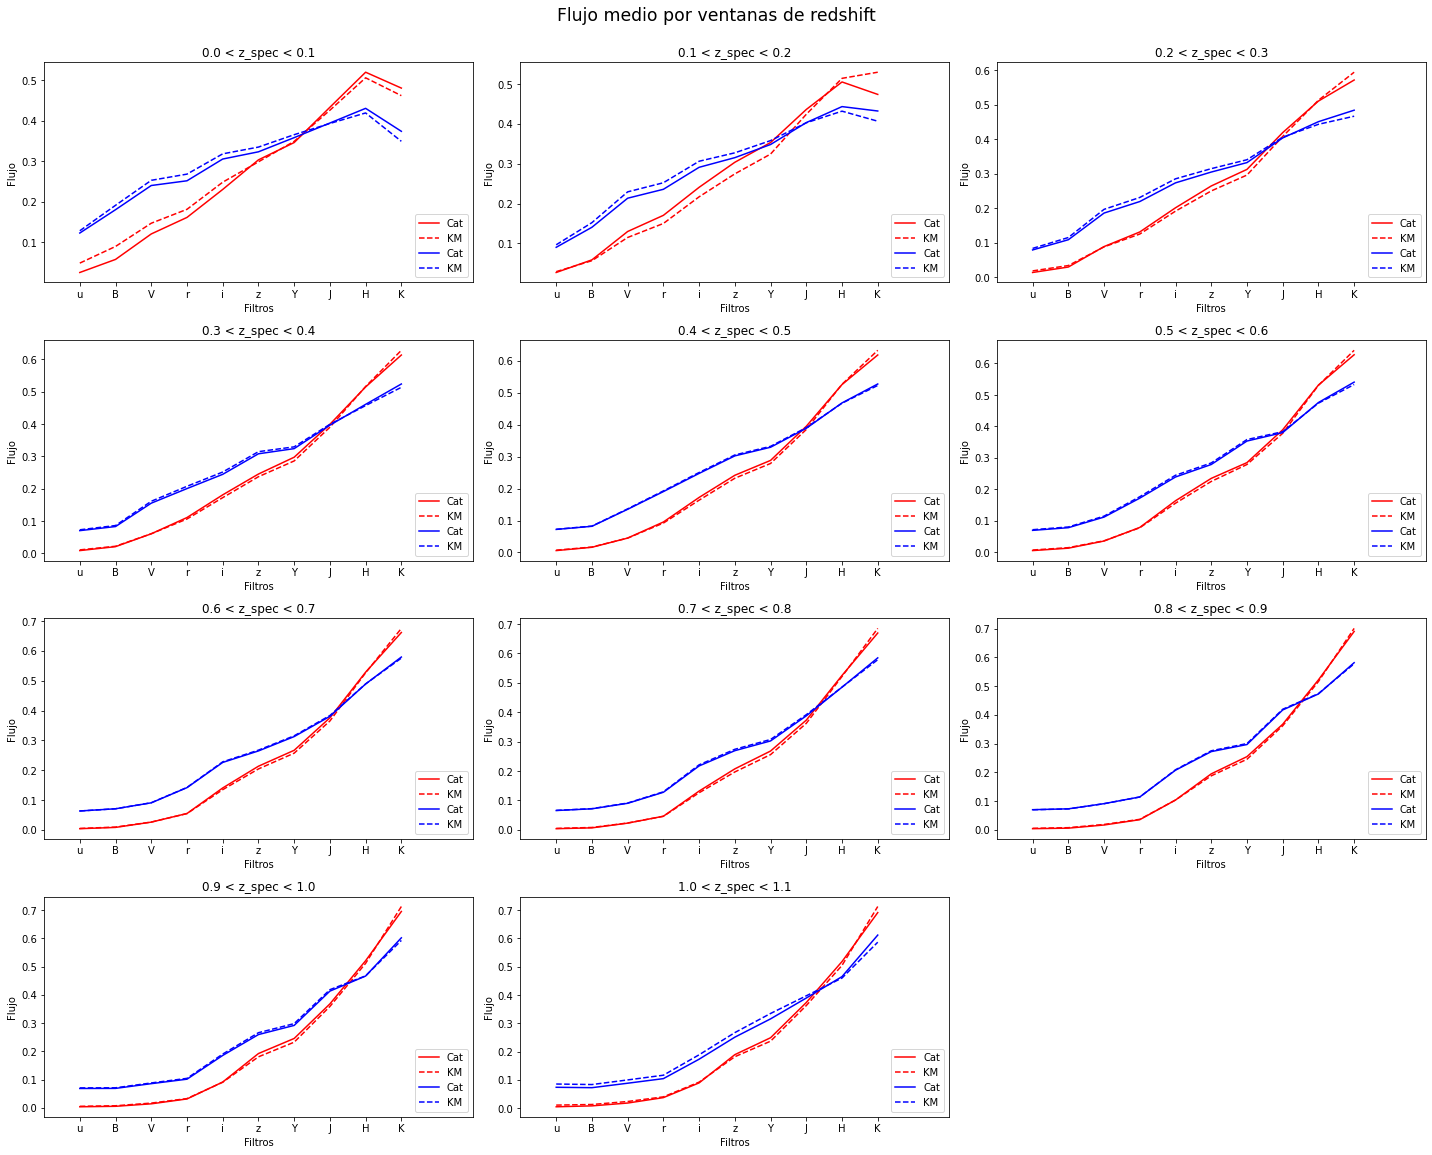

In [72]:
z=np.arange(0,1.2,.1)

filters=['u','B','V','r','i','z','Y','J','H','K']
#colors=[red, green, blue]     #lista con los dataframes de las galaxias según color
#plotcolor=['r','g','b']

plt.figure(figsize=(20,16))
plt.suptitle('Flujo medio por ventanas de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    rojas=bines[j].loc[bines[j]['type']==0] #rojas catalogo en bin 
    rojasKM=bines[j].loc[bines[j]['tipos']==0]#rojas KM en bin incluye también las que según catálogo son verdes
    azules=bines[j].loc[bines[j]['type']==2]#azules catálogo en bin
    azulesKM=bines[j].loc[bines[j]['tipos']==2]#azules KM en bin .loc[()&(bines[j]['type']!=1)] esto último elimina verdes
    plt.subplot(4, 3, j+1)
    plt.plot(filters, rojas[nfiltros].mean() ,color='red', label='Cat')
    plt.plot(filters, rojasKM[nfiltros].mean() ,'r--', label='KM' )
    plt.plot(filters, azules[nfiltros].mean(), color='blue', label='Cat')
    plt.plot(filters, azulesKM[nfiltros].mean() , 'b--', label='KM')
    plt.xlim([-1,11])
    plt.xlabel('Filtros')
    plt.ylabel('Flujo')
    plt.legend(loc='lower right')
    plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout();

## KMeans con componentes ppales

Corremos el algoritmo KMeans usando solo las componentes principales que hemos calculado

In [73]:
kmeans = KMeans(n_clusters=2, n_init=800, max_iter=100000)
kmarray=Tab[ppalcomps].to_numpy() 
kmeans.fit(kmarray)

KMeans(max_iter=100000, n_clusters=2, n_init=800)

In [74]:
centros = pd.DataFrame(kmeans.cluster_centers_, columns=ppalcomps)
centros

,0,1
0,4.365938,-26.279530
1,4.909206,-28.458132


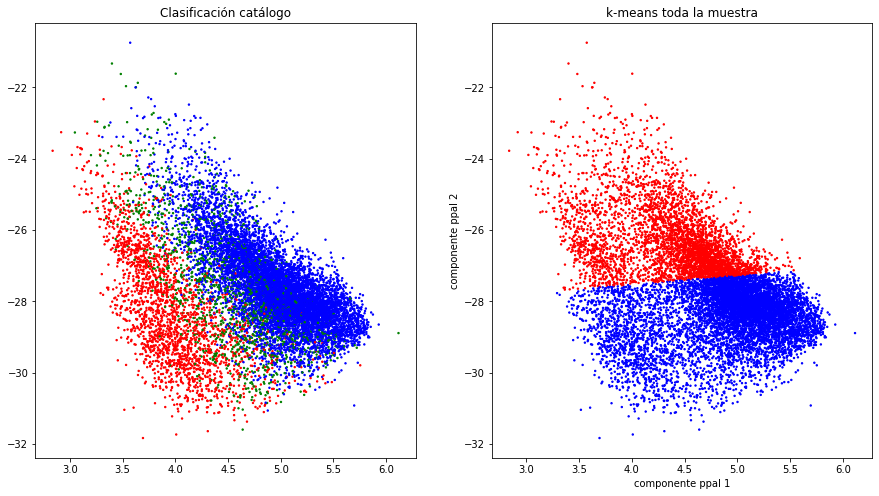

In [75]:
#kmeans.labels_
Tabclasif=Tab
Tabclasif['KMtype']=kmeans.labels_
cplot = {0:'red', 1:'blue'}
fig, ax=plt.subplots(1,2, figsize=(15,8))
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_title('Clasificación catálogo')
ax[1].scatter(Tab[0], Tab[1], c=Tabclasif['KMtype'].map(cplot), s=2)
ax[1].set_xlabel('componente ppal 1')
ax[1].set_ylabel('componente ppal 2')
ax[1].set_title('k-means toda la muestra')
# plt.savefig('Figuras para Latex/Supervisados/kNNtestppalcomps.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,6))
plt.savefig('Figuras para Latex/No supervisados/k-means/ppalcompstodo.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,8));

## KMeans por vtnas redshift con ppal comps

In [76]:
np.linspace(0,11,10)

array([ 0.        ,  1.22222222,  2.44444444,  3.66666667,  4.88888889,
        6.11111111,  7.33333333,  8.55555556,  9.77777778, 11.        ])

In [77]:
np.arange(0,1.2,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [78]:
z=np.arange(0,1.2,.1)
kmeans = KMeans(n_clusters=2, n_init=420, max_iter=10000)
TABLA = pd.DataFrame([],columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas','pr. rojo', 'recall rojo','f1sc rojo', 'azules', 'KM azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
TABLAsv = pd.DataFrame([],columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas','pr. rojo', 'recall rojo','f1sc rojo', 'azules', 'KM azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
bines=[]#Lista donde vamos a ir guardando los dataframes de cada bin de redshift con la cladificación de KMeans.

for i in range(len(z)-1):
        X=Tab.loc[(Tab['zspec']>z[i])&(Tab['zspec']<z[i+1])]
        kmarray=X[ppalcomps].to_numpy() #ppal comps = [0,1], las columnas con las ppal comps se llaman así.
        kmeans.fit(kmarray)#la última definición de kmarray son las ppal comps
        #ahora va el dataFrame con las posiciones de los centroides, que hay que cambiar si cambian los inputs
        tipos = kmeans.labels_
        centroides2 = pd.DataFrame(kmeans.cluster_centers_, columns=ppalcomps) #dataframe con posición de los 2 centroides
        #Ahora en vista de los gráficos las rojas tienen menor componente 0 
        if centroides2.iloc[0][0]>centroides2.iloc[1][0]: #esto es que las tipo 0 del algortimo serán las azules
            #hay que cambiar los 0 por 2 y los 1 por 0
            for h in range(len(tipos)):
                if tipos[h]==0:
                    tipos[h]=2
                    continue
                if tipos[h]==1:
                    tipos[h]=0
                    
        if centroides2.iloc[0][0]<centroides2.iloc[1][0]:#esto es que las tipo 0 del algoritmo son las rojas
            for j in range(len(tipos)):
                if tipos[j]==1:
                    tipos[j]=2 
                    
        matrix=confusion_matrix(X['type'],tipos)
        report=classification_report(X['type'],tipos, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
        fila = [str(round(z[i],1))+'-'+str(round(z[i+1],1)), sum(sum(confusion_matrix(X['type'],tipos))) ,report['accuracy'],
                             report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
                            report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
        TABLA.loc[len(TABLA.index)] = fila
        
        #Ahora tabla sin verdes
        #Ahora quiero eliminar las verdes del análisis. Elimino del data frame las que son verdes
        X['tipos']=tipos #columna añadida a data frame X con clasif kmeans. 0 rojo 1 verde 2 azul. Nunca habrá 1s.
        bines.append(X)
        Xsv=X[X.type != 1]
        matrix=confusion_matrix(Xsv['type'],Xsv['tipos'])
        report=classification_report(Xsv['type'],Xsv['tipos'], output_dict=True, target_names=['rojo','azul'], zero_division=0)
        fila = [str(round(z[i],1))+'-'+str(round(z[i+1],1)), sum(sum(matrix)) ,report['accuracy'],
                             report['rojo']['support'],matrix[0,0]+matrix[1,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
                            report['azul']['support'],matrix[1,1]+matrix[0,1],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
        TABLAsv.loc[len(TABLAsv.index)] = fila

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4532\1290973192.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif kmeans. 0 rojo 1 verde 2 azul. Nunca habrá 1s.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4532\1290973192.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tipos']=tipos #columna añadida a data frame X con clasif kmeans. 0 rojo 1 verde 2 azul. Nunca habrá 1s.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4532\1290973192.py:39: Se

In [79]:
TABLA

,redshift,num galax,accuracy total,rojas,KM rojas,pr. rojo,recall rojo,f1sc rojo,azules,KM azules,pr. azul,recall azul,f1sc azul
0,0.0-0.1,144,0.347222,1,66,0.015152,1.000000,0.029851,87,78,0.628205,0.563218,0.593939
1,0.1-0.2,658,0.445289,33,294,0.091837,0.818182,0.165138,458,364,0.730769,0.580786,0.647202
2,0.2-0.3,1135,0.532159,117,482,0.190871,0.786325,0.307179,801,653,0.784074,0.639201,0.704264
3,0.3-0.4,2136,0.556648,379,963,0.273105,0.693931,0.391952,1511,1173,0.789429,0.612839,0.690015
4,0.4-0.5,1136,0.506162,222,496,0.219758,0.490991,0.303621,782,640,0.728125,0.595908,0.655415
5,0.5-0.6,1143,0.418198,226,522,0.136015,0.314159,0.189840,811,621,0.655395,0.501850,0.568436
6,0.6-0.7,1668,0.723022,376,622,0.487138,0.805851,0.607214,1123,1046,0.863289,0.804096,0.832642
7,0.7-0.8,1378,0.761974,307,492,0.548780,0.879479,0.675845,923,886,0.880361,0.845070,0.862355
8,0.8-0.9,1327,0.755840,279,470,0.534043,0.899642,0.670227,888,857,0.877480,0.846847,0.861891
9,0.9-1.0,720,0.769444,138,229,0.515284,0.855072,0.643052,509,491,0.887984,0.856582,0.872000


In [80]:
TABLAsv

,redshift,num galax,accuracy total,rojas,KM rojas,pr. rojo,recall rojo,f1sc rojo,azules,KM azules,pr. azul,recall azul,f1sc azul
0,0.0-0.1,88,0.568182,1,39,0.025641,1.000000,0.050000,87,49,1.000000,0.563218,0.720588
1,0.1-0.2,491,0.596741,33,219,0.123288,0.818182,0.214286,458,272,0.977941,0.580786,0.728767
2,0.2-0.3,918,0.657952,117,381,0.241470,0.786325,0.369478,801,537,0.953445,0.639201,0.765321
3,0.3-0.4,1890,0.629101,379,848,0.310142,0.693931,0.428688,1511,1042,0.888676,0.612839,0.725421
4,0.4-0.5,1004,0.572709,222,425,0.256471,0.490991,0.336940,782,579,0.804836,0.595908,0.684791
5,0.5-0.6,1037,0.460945,226,475,0.149474,0.314159,0.202568,811,562,0.724199,0.501850,0.592862
6,0.6-0.7,1499,0.804536,376,523,0.579350,0.805851,0.674082,1123,976,0.925205,0.804096,0.860410
7,0.7-0.8,1230,0.853659,307,413,0.653753,0.879479,0.750000,923,817,0.954712,0.845070,0.896552
8,0.8-0.9,1167,0.859469,279,387,0.648579,0.899642,0.753754,888,780,0.964103,0.846847,0.901679
9,0.9-1.0,647,0.856260,138,191,0.617801,0.855072,0.717325,509,456,0.956140,0.856582,0.903627


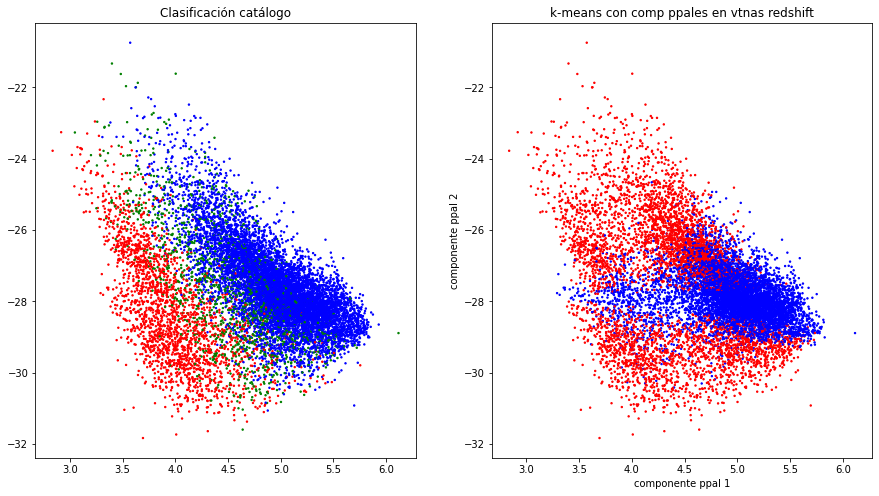

In [81]:
colors = {0:'red', 1:'green', 2:'blue'}
fig, ax=plt.subplots(1,2, figsize=(15,8))
ax[0].scatter(Tab[0], Tab[1], c=Tab['type'].map(colors), s=2)
ax[0].set_title('Clasificación catálogo')
for i in range(len(bines)):
    ax[1].scatter(bines[i][0], bines[i][1], c=bines[i]['tipos'].map(colors), s=2)
    
ax[1].set_title('k-means con comp ppales en vtnas redshift')
ax[1].set_xlabel('componente ppal 1')
ax[1].set_ylabel('componente ppal 2')
plt.savefig('Figuras para Latex/No supervisados/k-means/ppalcompsvtns.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,8));

En vista de estos gráficos... KMeans por ventanas de redshift con las ppal comps tampoco va muy bien. Para ver por qué puede ser voy a representar el gráfico de componentes ppales por ventanas de redshift, para comprobar cómo se va 'rellenando' el plot según z.

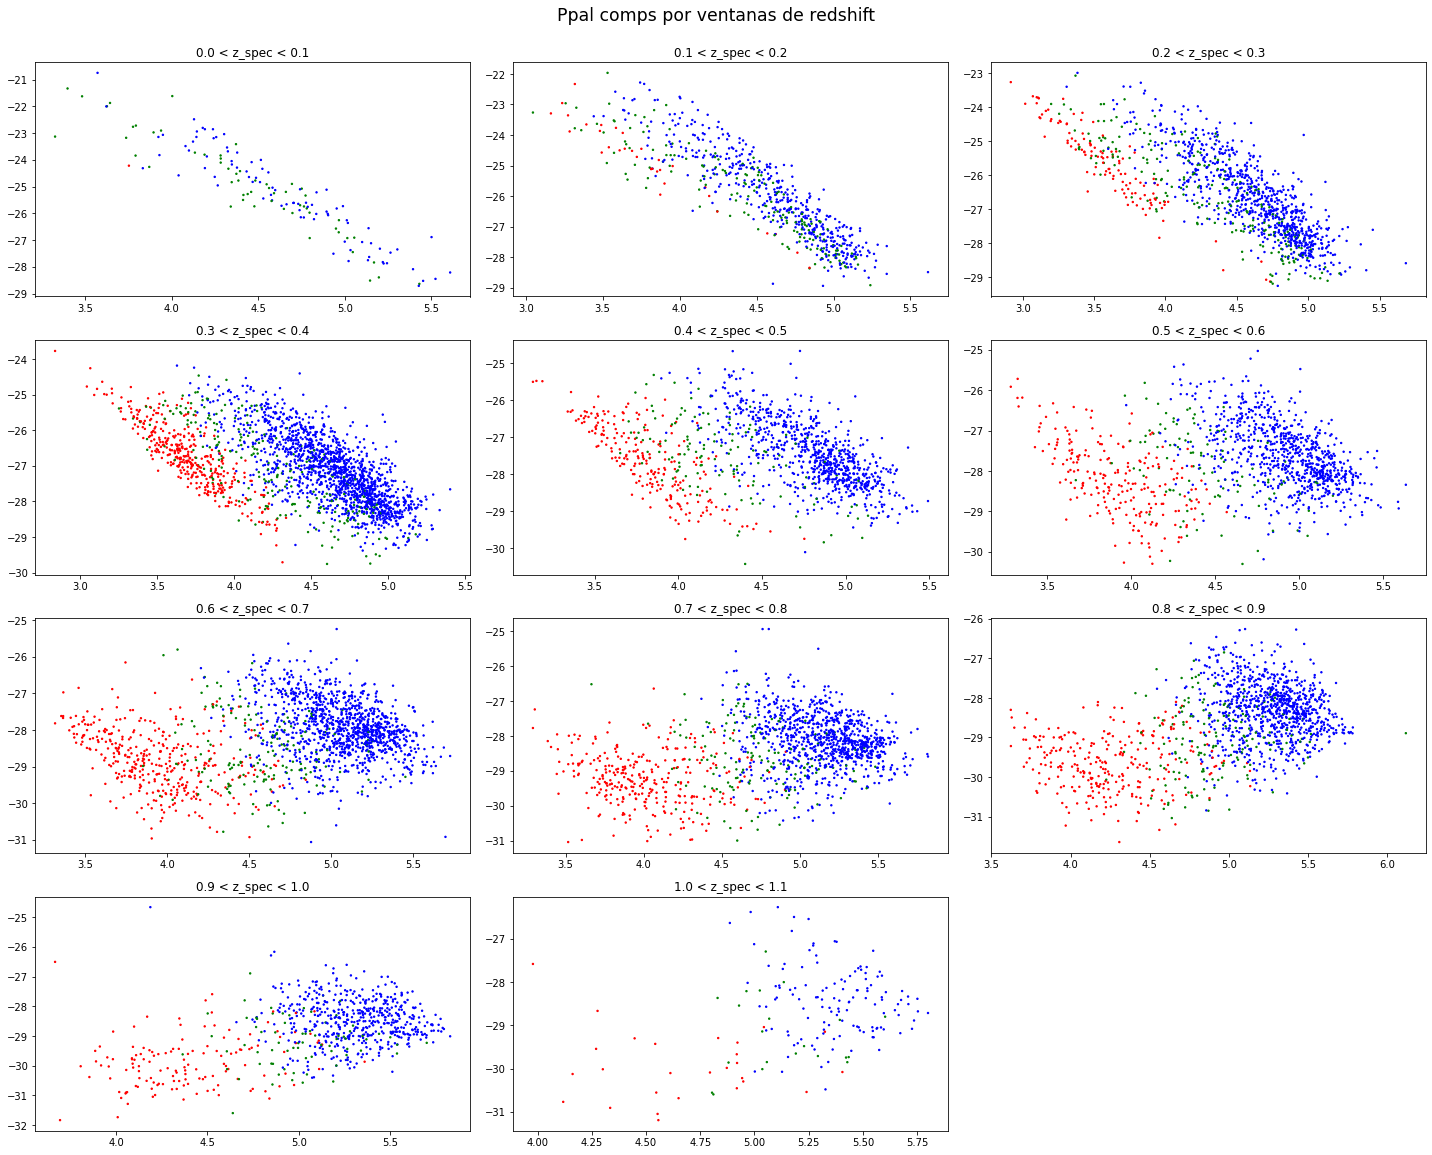

In [82]:
z=np.arange(0,1.2,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(20,16))
plt.suptitle('Ppal comps por ventanas de redshift', size='xx-large', y=1)
for j in range(len(z)-1):
    X=Tab.loc[(Tab['zspec']>z[j])&(Tab['zspec']<z[j+1])]
    plt.subplot(4, 3, j+1)
    plt.scatter(X[0], X[1], c=X['type'].map(colors), s=2)
    plt.title('{} < z_spec < {}'.format(round(z[j],1),round(z[j+1],1)))
        
plt.tight_layout();

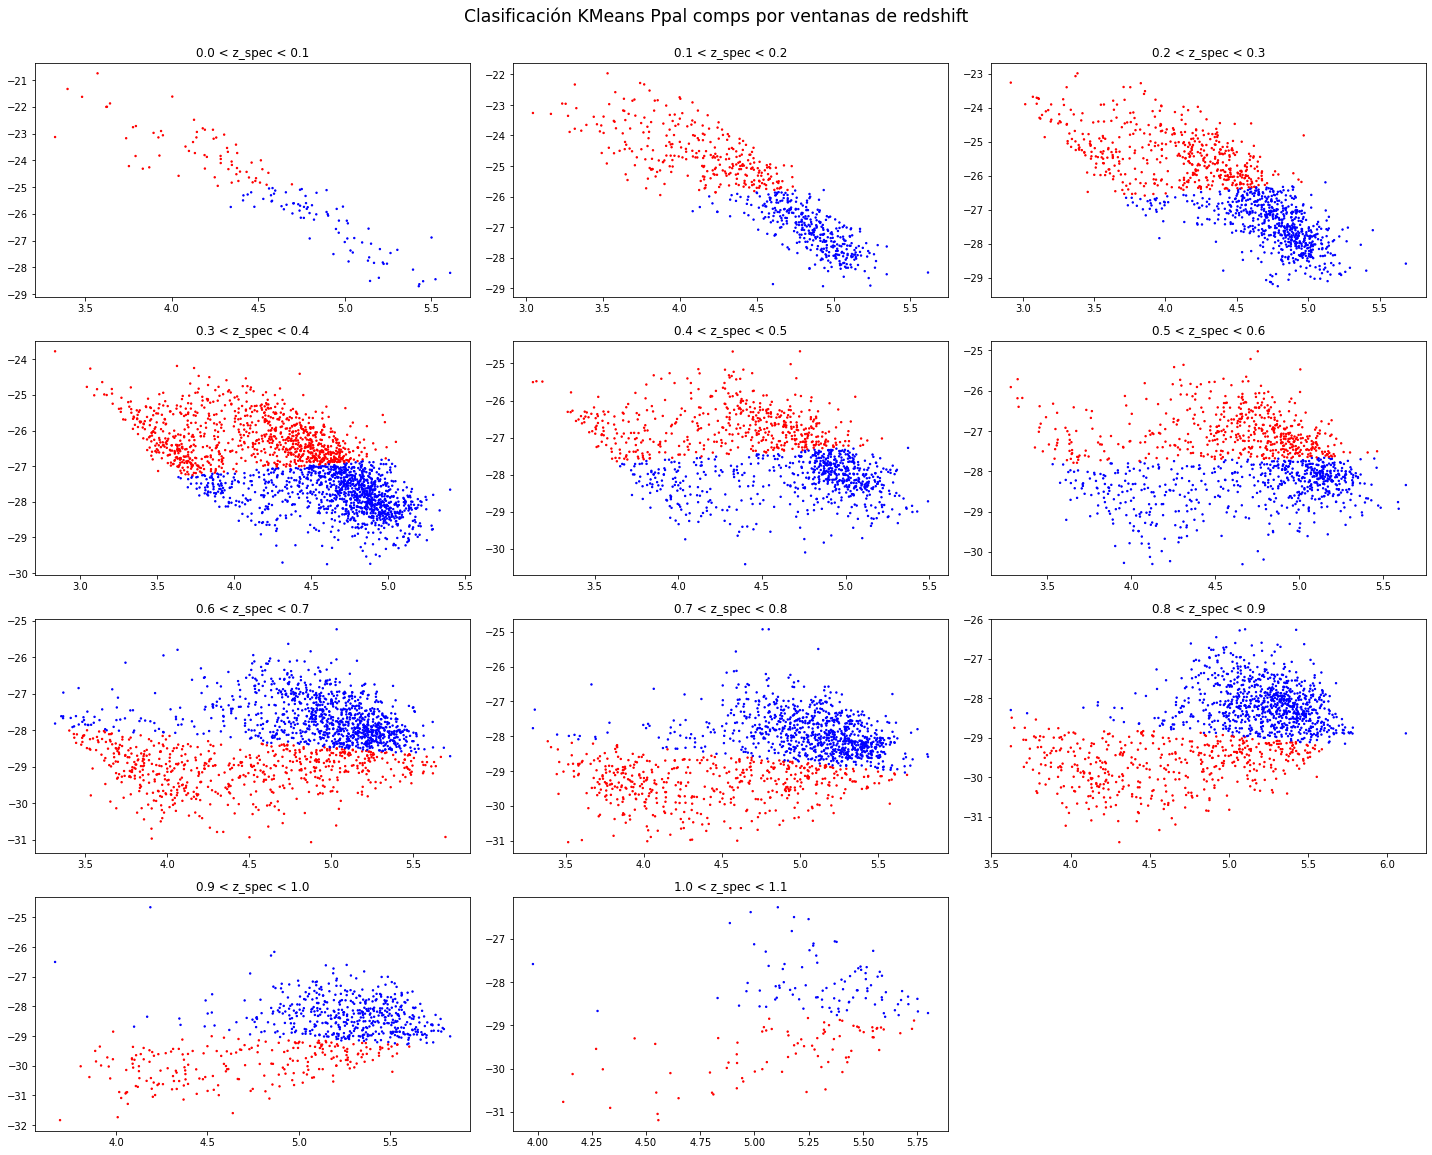

In [83]:
z=np.arange(0,1.2,.1)
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(20,16))
plt.suptitle('Clasificación KMeans Ppal comps por ventanas de redshift', size='xx-large', y=1)
for i in range(len(bines)):
    plt.subplot(4, 3, i+1)
    plt.scatter(bines[i][0], bines[i][1], c=bines[i]['tipos'].map(colors), s=2)
    #plt.scatter(X[0], X[1], c=X['type'].map(colors), s=2)
    plt.title('{} < z_spec < {}'.format(round(z[i],1),round(z[i+1],1)))
        
plt.tight_layout();

___
***
___